In [16]:
import mne
import os
import scipy.stats
import matplotlib

import matplotlib.pyplot as plt
import numpy as np

from autoreject import AutoReject, get_rejection_threshold

from src.utils import get_bids_file
from src.params import BIDS_PATH, PREPROC_PATH, SUBJ_CLEAN, ACTIVE_RUN, RESULT_PATH, EVENTS_ID, FIG_PATH
from mne.epochs import equalize_epoch_counts
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mne.viz import plot_compare_evokeds

In [17]:
task = 'LaughterActive'
subj_list = SUBJ_CLEAN
stage = "epo"

if task == 'LaughterActive' :
    run_list = ACTIVE_RUN
elif task == 'LaughterPassive':
    run_list = PASSIVE_RUN


# Select what conditions to compute (str)
cond1 = 'LaughReal'
cond2 = 'LaughPosed'
conditions = conditions = cond1 + '-' + cond2
condition_list = [cond1, cond2]
picks = "meg" # Select MEG channels

In [18]:
evokeds_all_subj = []

for subj in SUBJ_CLEAN :

    for run in run_list : 

        # Get path
        _, epo_path = get_bids_file(PREPROC_PATH, subj=subj, task=task, run=run, measure='clean-', stage='epo')

        epochs = mne.read_epochs(epo_path, preload=True)

        evokeds_cond1 = epochs[cond1].average()
        evokeds_cond2 = epochs[cond2].average()
        evokeds = mne.combine_evoked([evokeds_cond1, evokeds_cond2], weights='nave')
        evokeds_all_subj.append(evokeds)
    
        evoked_copy = evokeds.copy()

grand_ave = mne.combine_evoked(evokeds_all_subj, weights='equal')

Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-01/ses-recording/meg/sub-01_ses-recording_task-LaughterActive_run-07_clean-epo.fif ...
    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
48 matching events found
No baseline correction applied
0 projection items activated
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-01/ses-recording/meg/sub-01_ses-recording_task-LaughterActive_run-08_clean-epo.fif ...
    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-01/ses-recording/meg/sub-01_ses-recording_task-LaughterActive_run-09_clean-epo.fif ...
    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF c

Not setting metadata
48 matching events found
No baseline correction applied
0 projection items activated
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-04/ses-recording/meg/sub-04_ses-recording_task-LaughterActive_run-11_clean-epo.fif ...
    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
48 matching events found
No baseline correction applied
0 projection items activated
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-04/ses-recording/meg/sub-04_ses-recording_task-LaughterActive_run-12_clean-epo.fif ...
    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-05/ses-recording/meg/sub-05_ses-recording_task-LaughterActive_run-07_

    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-08/ses-recording/meg/sub-08_ses-recording_task-LaughterActive_run-09_clean-epo.fif ...
    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-08/ses-recording/meg/sub-08_ses-recording_task-LaughterActive_run-10_clean-epo.fif ...
    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Reading /home/cla

    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
39 matching events found
No baseline correction applied
0 projection items activated
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-12/ses-recording/meg/sub-12_ses-recording_task-LaughterActive_run-07_clean-epo.fif ...
    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
46 matching events found
No baseline correction applied
0 projection items activated
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-12/ses-recording/meg/sub-12_ses-recording_task-LaughterActive_run-08_clean-epo.fif ...
    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
48 matching events found
No baseline correction applied
0 projection items activated
Reading /home/cla

    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-15/ses-recording/meg/sub-15_ses-recording_task-LaughterActive_run-11_clean-epo.fif ...
    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-15/ses-recording/meg/sub-15_ses-recording_task-LaughterActive_run-12_clean-epo.fif ...
    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Reading /home/cla

    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-20/ses-recording/meg/sub-20_ses-recording_task-LaughterActive_run-09_clean-epo.fif ...
    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-20/ses-recording/meg/sub-20_ses-recording_task-LaughterActive_run-10_clean-epo.fif ...
    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Reading /home/cla

    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
34 matching events found
No baseline correction applied
0 projection items activated
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-24/ses-recording/meg/sub-24_ses-recording_task-LaughterActive_run-07_clean-epo.fif ...
    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-24/ses-recording/meg/sub-24_ses-recording_task-LaughterActive_run-08_clean-epo.fif ...
    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
46 matching events found
No baseline correction applied
0 projection items activated
Reading /home/cla

    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-30/ses-recording/meg/sub-30_ses-recording_task-LaughterActive_run-11_clean-epo.fif ...
    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-30/ses-recording/meg/sub-30_ses-recording_task-LaughterActive_run-12_clean-epo.fif ...
    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Reading /home/cla

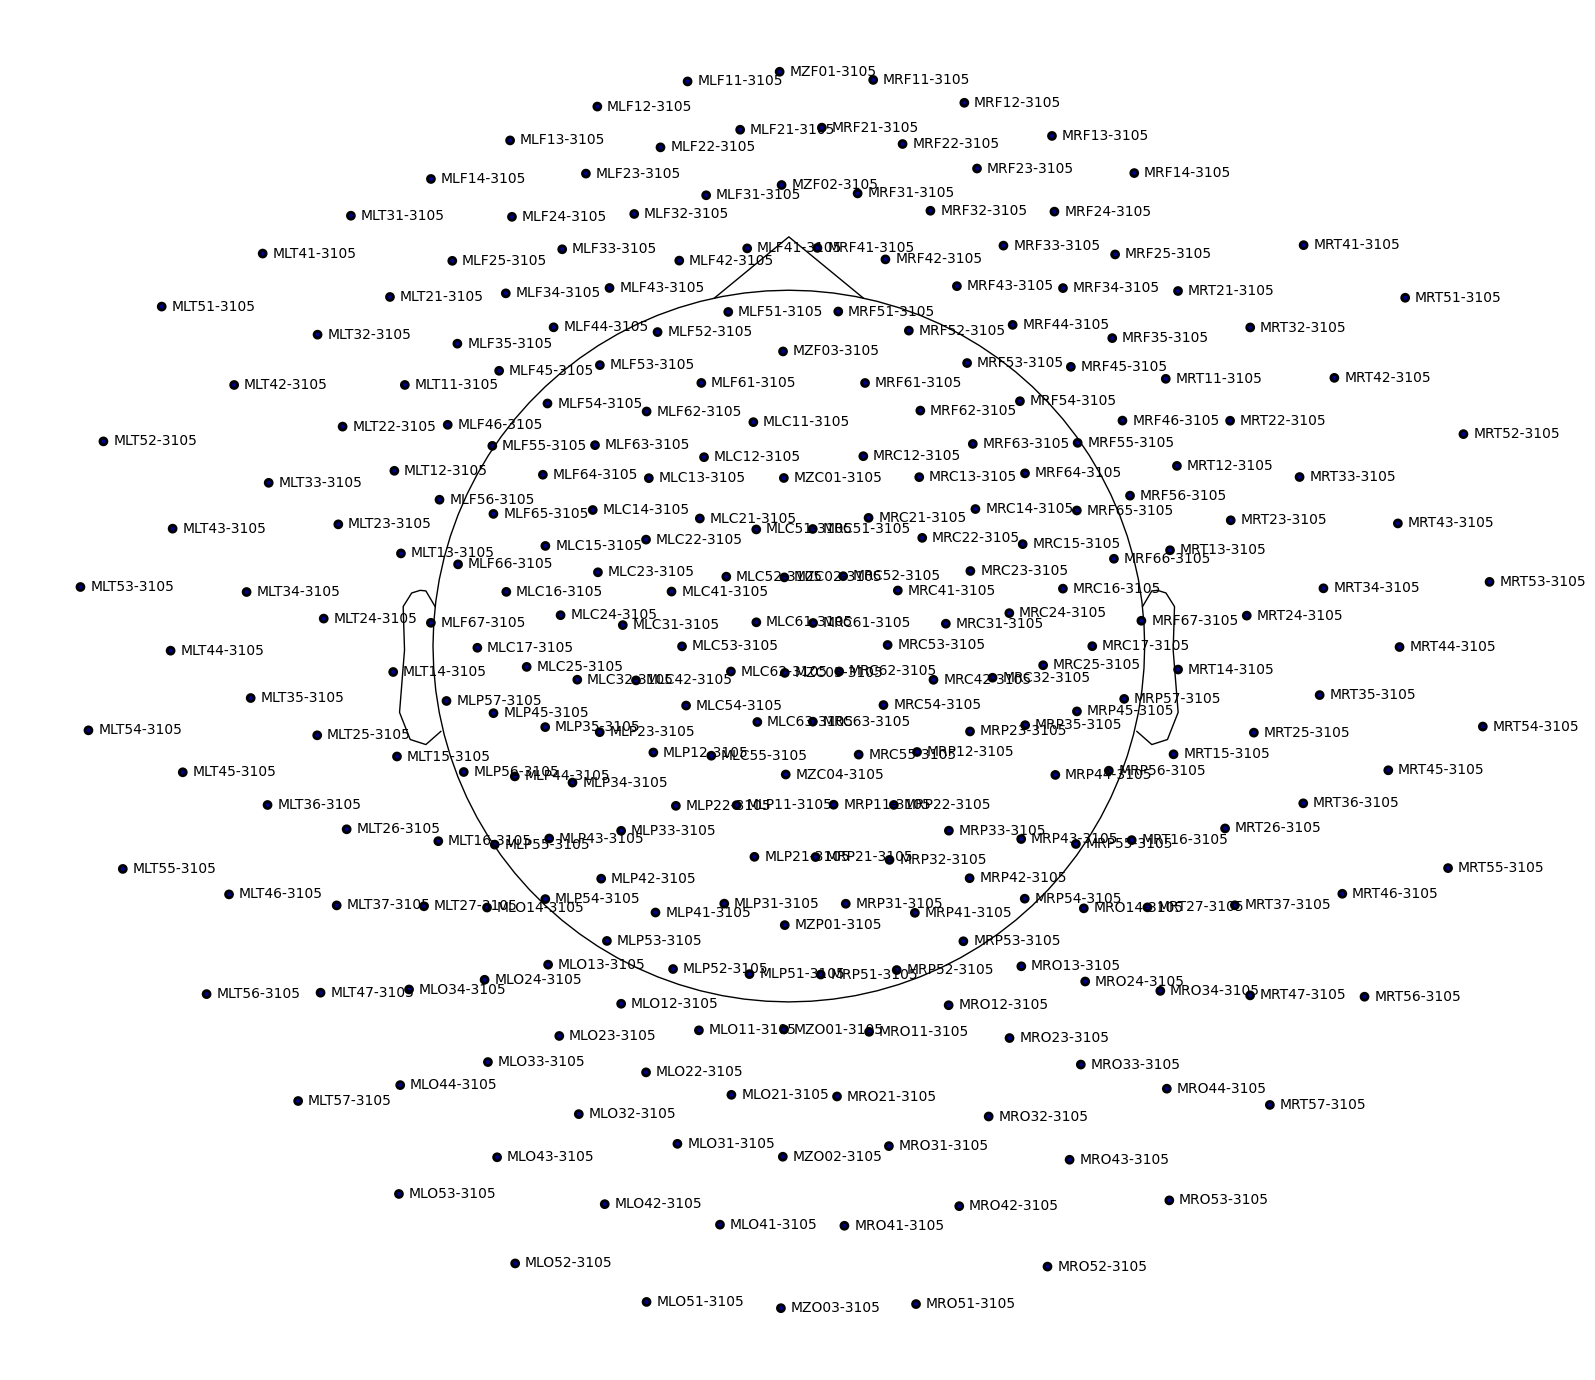

In [19]:
# Plot sensors location
fig, ax = plt.subplots(1, figsize=(20,20))
grand_ave.plot_sensors(show_names=True, axes=ax)
plt.show()

# N100

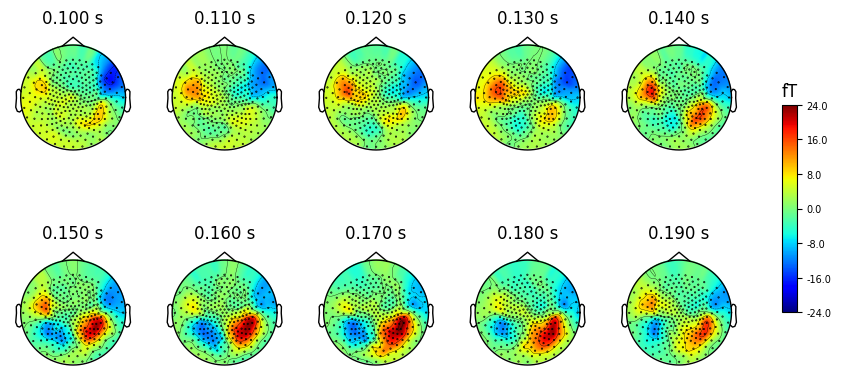

In [20]:
# Plot topomaps around N100
time_range = np.arange(0.1, 0.2, 0.01)
grand_ave.plot_topomap(times=time_range, nrows=2, ncols=5, 
                       extrapolate='head', sphere=(0, 0.017, 0, 0.19),
                       cmap='jet')
plt.show()

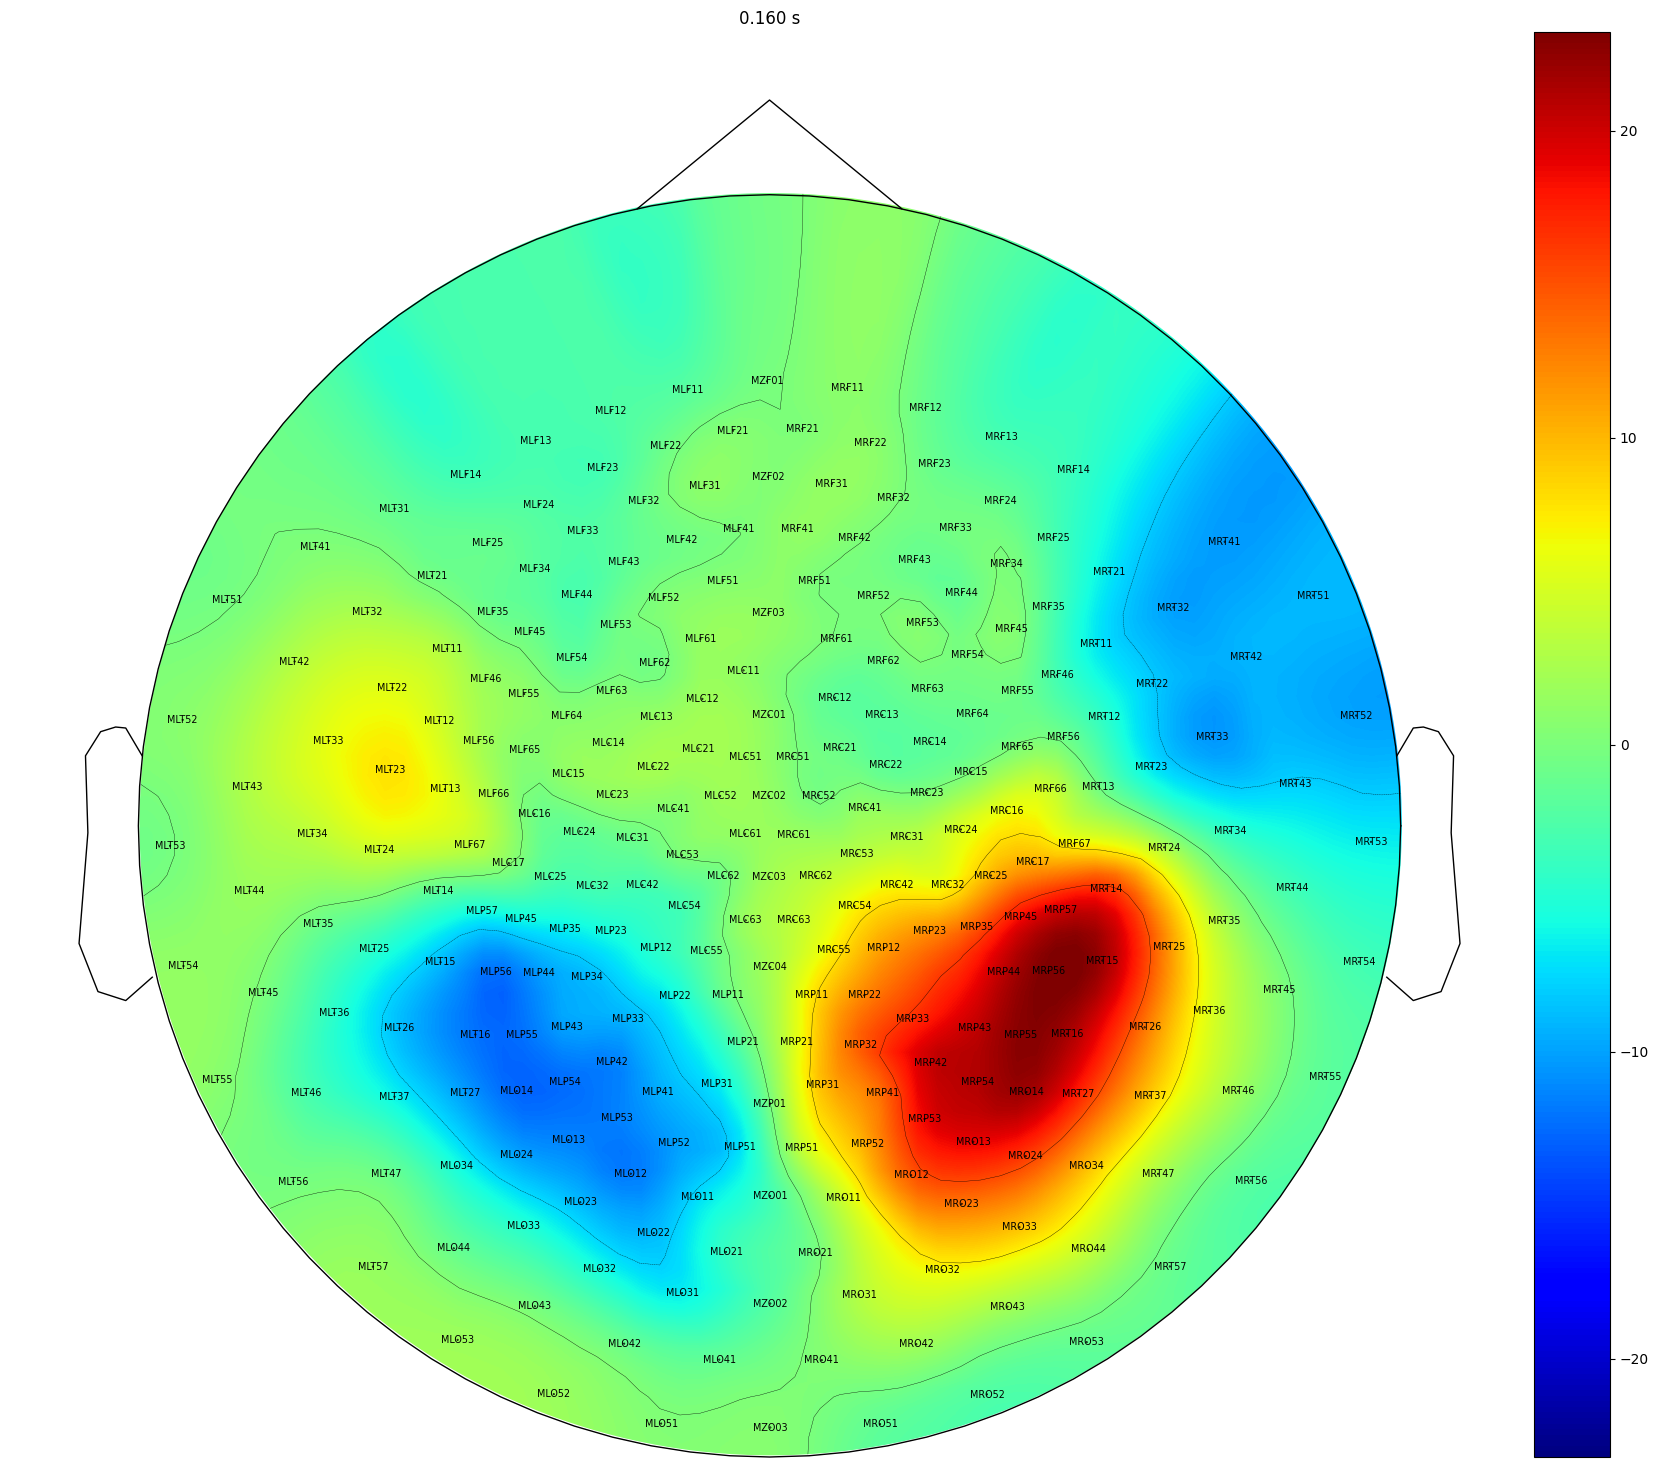

In [21]:
# Look at electrods of interest

time_range = [0.16]

for time in time_range : 
    
    fig, ax_topo = plt.subplots(1, 1, figsize=(20, 20))

    grand_ave.plot_topomap(times=time, nrows=1, ncols=1, 
                           extrapolate='head', sphere=(0, 0.02, 0, 0.19),
                           cmap='jet', axes=ax_topo, colorbar=False,
                           show=False, show_names=True)
    
    image = ax_topo.images[0]

    # create additional axes (for ERF and colorbar)
    divider = make_axes_locatable(ax_topo)

    # add axes for colorbar
    ax_colorbar = divider.append_axes('right', size='5%', pad=0.05)
    plt.colorbar(image, cax=ax_colorbar)
    
    plt.show()

In [22]:
# select data at time=0.170 sec
time_select = np.where(grand_ave.times.round(decimals=3) == 0.17)
grand_ave_n100 = grand_ave.get_data()[:, time_select]

minimum = np.min(grand_ave_n100)
print(minimum)

n100_elec = []

for i, elec in enumerate(grand_ave.info['ch_names']):
    if grand_ave_n100[i] < -10e-15 :
        n100_elec.append(elec)


-1.2855009721170959e-14


In [23]:
n100_elec

['MLO12-3105',
 'MLO13-3105',
 'MLO14-3105',
 'MLP42-3105',
 'MLP44-3105',
 'MLP53-3105',
 'MLP54-3105',
 'MLP55-3105',
 'MLP56-3105',
 'MLT15-3105',
 'MLT16-3105',
 'MLT27-3105',
 'MRT33-3105']

In [24]:
print(len(n100_elec)) 

n100_elec_clean = n100_elec.copy()

for i, e in enumerate(n100_elec) : 
    if 'MRT' in n100_elec[i] : 
        n100_elec_clean.remove(e) # Remove regions
        
print(len(n100_elec_clean))    

13
12


processing --> 01
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-01/ses-recording/meg/sub-01_ses-recording_task-LaughterActive_run-07_clean-epo.fif ...
    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
48 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 01
Reading /home/claraelk/

/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 01
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-01/ses-recording/meg/sub-01_ses-recording_task-LaughterActive_run-09_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 01
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-01/ses-recording/meg/sub-01_ses-recording_task-LaughterActive_run-10_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
49 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 01
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-01/ses-recording/meg/sub-01_ses-recording_task-LaughterActive_run-11_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
49 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 01
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-01/ses-recording/meg/sub-01_ses-recording_task-LaughterActive_run-12_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 02
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-02/ses-recording/meg/sub-02_ses-recording_task-LaughterActive_run-07_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
49 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 02
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-02/ses-recording/meg/sub-02_ses-recording_task-LaughterActive_run-08_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 02
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-02/ses-recording/meg/sub-02_ses-recording_task-LaughterActive_run-09_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
49 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 02
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-02/ses-recording/meg/sub-02_ses-recording_task-LaughterActive_run-10_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
48 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 02
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-02/ses-recording/meg/sub-02_ses-recording_task-LaughterActive_run-11_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 02
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-02/ses-recording/meg/sub-02_ses-recording_task-LaughterActive_run-12_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
46 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 03
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-03/ses-recording/meg/sub-03_ses-recording_task-LaughterActive_run-07_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 03
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-03/ses-recording/meg/sub-03_ses-recording_task-LaughterActive_run-08_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 03
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-03/ses-recording/meg/sub-03_ses-recording_task-LaughterActive_run-09_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 03
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-03/ses-recording/meg/sub-03_ses-recording_task-LaughterActive_run-10_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
49 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 03
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-03/ses-recording/meg/sub-03_ses-recording_task-LaughterActive_run-11_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 03
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-03/ses-recording/meg/sub-03_ses-recording_task-LaughterActive_run-12_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
49 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 04
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-04/ses-recording/meg/sub-04_ses-recording_task-LaughterActive_run-07_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 04
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-04/ses-recording/meg/sub-04_ses-recording_task-LaughterActive_run-08_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
46 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 04
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-04/ses-recording/meg/sub-04_ses-recording_task-LaughterActive_run-09_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
48 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 04
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-04/ses-recording/meg/sub-04_ses-recording_task-LaughterActive_run-10_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
48 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 04
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-04/ses-recording/meg/sub-04_ses-recording_task-LaughterActive_run-11_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
48 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 04
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-04/ses-recording/meg/sub-04_ses-recording_task-LaughterActive_run-12_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 05
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-05/ses-recording/meg/sub-05_ses-recording_task-LaughterActive_run-07_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
48 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 05
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-05/ses-recording/meg/sub-05_ses-recording_task-LaughterActive_run-08_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 05
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-05/ses-recording/meg/sub-05_ses-recording_task-LaughterActive_run-09_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 05
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-05/ses-recording/meg/sub-05_ses-recording_task-LaughterActive_run-10_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 05
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-05/ses-recording/meg/sub-05_ses-recording_task-LaughterActive_run-11_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 05
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-05/ses-recording/meg/sub-05_ses-recording_task-LaughterActive_run-12_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 06
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-06/ses-recording/meg/sub-06_ses-recording_task-LaughterActive_run-07_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 06
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-06/ses-recording/meg/sub-06_ses-recording_task-LaughterActive_run-08_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 06
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-06/ses-recording/meg/sub-06_ses-recording_task-LaughterActive_run-09_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
49 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 06
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-06/ses-recording/meg/sub-06_ses-recording_task-LaughterActive_run-10_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 06
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-06/ses-recording/meg/sub-06_ses-recording_task-LaughterActive_run-11_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 06
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-06/ses-recording/meg/sub-06_ses-recording_task-LaughterActive_run-12_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 07
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-07/ses-recording/meg/sub-07_ses-recording_task-LaughterActive_run-07_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 07
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-07/ses-recording/meg/sub-07_ses-recording_task-LaughterActive_run-08_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 07
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-07/ses-recording/meg/sub-07_ses-recording_task-LaughterActive_run-09_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 07
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-07/ses-recording/meg/sub-07_ses-recording_task-LaughterActive_run-10_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
49 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 07
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-07/ses-recording/meg/sub-07_ses-recording_task-LaughterActive_run-11_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 07
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-07/ses-recording/meg/sub-07_ses-recording_task-LaughterActive_run-12_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
47 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 08
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-08/ses-recording/meg/sub-08_ses-recording_task-LaughterActive_run-07_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
49 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 08
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-08/ses-recording/meg/sub-08_ses-recording_task-LaughterActive_run-08_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 08
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-08/ses-recording/meg/sub-08_ses-recording_task-LaughterActive_run-09_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 08
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-08/ses-recording/meg/sub-08_ses-recording_task-LaughterActive_run-10_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 08
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-08/ses-recording/meg/sub-08_ses-recording_task-LaughterActive_run-11_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 08
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-08/ses-recording/meg/sub-08_ses-recording_task-LaughterActive_run-12_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
49 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 09
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-09/ses-recording/meg/sub-09_ses-recording_task-LaughterActive_run-07_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 09
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-09/ses-recording/meg/sub-09_ses-recording_task-LaughterActive_run-08_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
49 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 09
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-09/ses-recording/meg/sub-09_ses-recording_task-LaughterActive_run-09_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 09
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-09/ses-recording/meg/sub-09_ses-recording_task-LaughterActive_run-10_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 09
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-09/ses-recording/meg/sub-09_ses-recording_task-LaughterActive_run-11_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
49 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 09
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-09/ses-recording/meg/sub-09_ses-recording_task-LaughterActive_run-12_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 10
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-10/ses-recording/meg/sub-10_ses-recording_task-LaughterActive_run-07_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 10
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-10/ses-recording/meg/sub-10_ses-recording_task-LaughterActive_run-08_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 10
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-10/ses-recording/meg/sub-10_ses-recording_task-LaughterActive_run-09_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 10
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-10/ses-recording/meg/sub-10_ses-recording_task-LaughterActive_run-10_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 10
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-10/ses-recording/meg/sub-10_ses-recording_task-LaughterActive_run-11_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 10
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-10/ses-recording/meg/sub-10_ses-recording_task-LaughterActive_run-12_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 11
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-11/ses-recording/meg/sub-11_ses-recording_task-LaughterActive_run-07_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
46 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)



/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.2s finished


processing --> 11
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-11/ses-recording/meg/sub-11_ses-recording_task-LaughterActive_run-08_clean-epo.fif ...
    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
48 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 11
Reading /home/claraelk/

/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
43 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 11
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-11/ses-recording/meg/sub-11_ses-recording_task-LaughterActive_run-10_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 11
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-11/ses-recording/meg/sub-11_ses-recording_task-LaughterActive_run-11_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
48 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 11
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-11/ses-recording/meg/sub-11_ses-recording_task-LaughterActive_run-12_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
39 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 12
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-12/ses-recording/meg/sub-12_ses-recording_task-LaughterActive_run-07_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
46 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 12
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-12/ses-recording/meg/sub-12_ses-recording_task-LaughterActive_run-08_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
48 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 12
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-12/ses-recording/meg/sub-12_ses-recording_task-LaughterActive_run-09_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
39 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 12
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-12/ses-recording/meg/sub-12_ses-recording_task-LaughterActive_run-10_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 12
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-12/ses-recording/meg/sub-12_ses-recording_task-LaughterActive_run-11_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 12
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-12/ses-recording/meg/sub-12_ses-recording_task-LaughterActive_run-12_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 13
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-13/ses-recording/meg/sub-13_ses-recording_task-LaughterActive_run-07_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
48 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 13
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-13/ses-recording/meg/sub-13_ses-recording_task-LaughterActive_run-08_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
48 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 13
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-13/ses-recording/meg/sub-13_ses-recording_task-LaughterActive_run-09_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
48 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 13
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-13/ses-recording/meg/sub-13_ses-recording_task-LaughterActive_run-10_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 13
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-13/ses-recording/meg/sub-13_ses-recording_task-LaughterActive_run-11_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
49 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 13
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-13/ses-recording/meg/sub-13_ses-recording_task-LaughterActive_run-12_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
49 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 14
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-14/ses-recording/meg/sub-14_ses-recording_task-LaughterActive_run-07_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
43 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 14
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-14/ses-recording/meg/sub-14_ses-recording_task-LaughterActive_run-08_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 14
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-14/ses-recording/meg/sub-14_ses-recording_task-LaughterActive_run-09_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
48 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 14
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-14/ses-recording/meg/sub-14_ses-recording_task-LaughterActive_run-10_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 14
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-14/ses-recording/meg/sub-14_ses-recording_task-LaughterActive_run-11_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 14
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-14/ses-recording/meg/sub-14_ses-recording_task-LaughterActive_run-12_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 15
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-15/ses-recording/meg/sub-15_ses-recording_task-LaughterActive_run-07_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
48 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 15
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-15/ses-recording/meg/sub-15_ses-recording_task-LaughterActive_run-08_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
44 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 15
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-15/ses-recording/meg/sub-15_ses-recording_task-LaughterActive_run-09_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 15
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-15/ses-recording/meg/sub-15_ses-recording_task-LaughterActive_run-10_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 15
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-15/ses-recording/meg/sub-15_ses-recording_task-LaughterActive_run-11_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 15
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-15/ses-recording/meg/sub-15_ses-recording_task-LaughterActive_run-12_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 16
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-16/ses-recording/meg/sub-16_ses-recording_task-LaughterActive_run-07_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
49 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 16
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-16/ses-recording/meg/sub-16_ses-recording_task-LaughterActive_run-08_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 16
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-16/ses-recording/meg/sub-16_ses-recording_task-LaughterActive_run-09_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 16
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-16/ses-recording/meg/sub-16_ses-recording_task-LaughterActive_run-10_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 16
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-16/ses-recording/meg/sub-16_ses-recording_task-LaughterActive_run-11_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
49 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 16
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-16/ses-recording/meg/sub-16_ses-recording_task-LaughterActive_run-12_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 18
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-18/ses-recording/meg/sub-18_ses-recording_task-LaughterActive_run-07_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 18
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-18/ses-recording/meg/sub-18_ses-recording_task-LaughterActive_run-08_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 18
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-18/ses-recording/meg/sub-18_ses-recording_task-LaughterActive_run-09_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 18
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-18/ses-recording/meg/sub-18_ses-recording_task-LaughterActive_run-10_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
49 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 18
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-18/ses-recording/meg/sub-18_ses-recording_task-LaughterActive_run-11_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
49 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 18
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-18/ses-recording/meg/sub-18_ses-recording_task-LaughterActive_run-12_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
49 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 19
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-19/ses-recording/meg/sub-19_ses-recording_task-LaughterActive_run-07_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 19
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-19/ses-recording/meg/sub-19_ses-recording_task-LaughterActive_run-08_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 19
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-19/ses-recording/meg/sub-19_ses-recording_task-LaughterActive_run-09_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 19
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-19/ses-recording/meg/sub-19_ses-recording_task-LaughterActive_run-10_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
49 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 19
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-19/ses-recording/meg/sub-19_ses-recording_task-LaughterActive_run-11_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 19
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-19/ses-recording/meg/sub-19_ses-recording_task-LaughterActive_run-12_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 20
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-20/ses-recording/meg/sub-20_ses-recording_task-LaughterActive_run-07_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 20
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-20/ses-recording/meg/sub-20_ses-recording_task-LaughterActive_run-08_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 20
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-20/ses-recording/meg/sub-20_ses-recording_task-LaughterActive_run-09_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 20
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-20/ses-recording/meg/sub-20_ses-recording_task-LaughterActive_run-10_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 20
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-20/ses-recording/meg/sub-20_ses-recording_task-LaughterActive_run-11_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
49 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 20
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-20/ses-recording/meg/sub-20_ses-recording_task-LaughterActive_run-12_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 21
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-21/ses-recording/meg/sub-21_ses-recording_task-LaughterActive_run-07_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 21
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-21/ses-recording/meg/sub-21_ses-recording_task-LaughterActive_run-08_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 21
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-21/ses-recording/meg/sub-21_ses-recording_task-LaughterActive_run-09_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 21
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-21/ses-recording/meg/sub-21_ses-recording_task-LaughterActive_run-10_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
49 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)



/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


processing --> 21
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-21/ses-recording/meg/sub-21_ses-recording_task-LaughterActive_run-11_clean-epo.fif ...


[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.2s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 21
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-21/ses-recording/meg/sub-21_ses-recording_task-LaughterActive_run-12_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 22
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-22/ses-recording/meg/sub-22_ses-recording_task-LaughterActive_run-07_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 22
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-22/ses-recording/meg/sub-22_ses-recording_task-LaughterActive_run-08_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 22
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-22/ses-recording/meg/sub-22_ses-recording_task-LaughterActive_run-09_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
49 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 22
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-22/ses-recording/meg/sub-22_ses-recording_task-LaughterActive_run-10_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 22
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-22/ses-recording/meg/sub-22_ses-recording_task-LaughterActive_run-11_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
49 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 22
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-22/ses-recording/meg/sub-22_ses-recording_task-LaughterActive_run-12_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 23
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-23/ses-recording/meg/sub-23_ses-recording_task-LaughterActive_run-07_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
42 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 23
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-23/ses-recording/meg/sub-23_ses-recording_task-LaughterActive_run-08_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
31 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 23
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-23/ses-recording/meg/sub-23_ses-recording_task-LaughterActive_run-09_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
38 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 23
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-23/ses-recording/meg/sub-23_ses-recording_task-LaughterActive_run-10_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
44 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 23
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-23/ses-recording/meg/sub-23_ses-recording_task-LaughterActive_run-11_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
28 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 23
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-23/ses-recording/meg/sub-23_ses-recording_task-LaughterActive_run-12_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
34 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 24
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-24/ses-recording/meg/sub-24_ses-recording_task-LaughterActive_run-07_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 24
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-24/ses-recording/meg/sub-24_ses-recording_task-LaughterActive_run-08_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
46 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 24
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-24/ses-recording/meg/sub-24_ses-recording_task-LaughterActive_run-09_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
48 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 24
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-24/ses-recording/meg/sub-24_ses-recording_task-LaughterActive_run-10_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 24
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-24/ses-recording/meg/sub-24_ses-recording_task-LaughterActive_run-11_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
49 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 24
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-24/ses-recording/meg/sub-24_ses-recording_task-LaughterActive_run-12_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
49 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 25
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-25/ses-recording/meg/sub-25_ses-recording_task-LaughterActive_run-07_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 25
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-25/ses-recording/meg/sub-25_ses-recording_task-LaughterActive_run-08_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 25
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-25/ses-recording/meg/sub-25_ses-recording_task-LaughterActive_run-09_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 25
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-25/ses-recording/meg/sub-25_ses-recording_task-LaughterActive_run-10_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 25
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-25/ses-recording/meg/sub-25_ses-recording_task-LaughterActive_run-11_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 25
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-25/ses-recording/meg/sub-25_ses-recording_task-LaughterActive_run-12_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)



/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


processing --> 28
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-28/ses-recording/meg/sub-28_ses-recording_task-LaughterActive_run-07_clean-epo.fif ...
    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 28
Reading /home/claraelk/

/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 28
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-28/ses-recording/meg/sub-28_ses-recording_task-LaughterActive_run-09_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 28
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-28/ses-recording/meg/sub-28_ses-recording_task-LaughterActive_run-10_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
48 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 28
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-28/ses-recording/meg/sub-28_ses-recording_task-LaughterActive_run-11_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
49 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 28
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-28/ses-recording/meg/sub-28_ses-recording_task-LaughterActive_run-12_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 30
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-30/ses-recording/meg/sub-30_ses-recording_task-LaughterActive_run-07_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 30
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-30/ses-recording/meg/sub-30_ses-recording_task-LaughterActive_run-08_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 30
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-30/ses-recording/meg/sub-30_ses-recording_task-LaughterActive_run-09_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 30
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-30/ses-recording/meg/sub-30_ses-recording_task-LaughterActive_run-10_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 30
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-30/ses-recording/meg/sub-30_ses-recording_task-LaughterActive_run-11_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 30
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-30/ses-recording/meg/sub-30_ses-recording_task-LaughterActive_run-12_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 32
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-32/ses-recording/meg/sub-32_ses-recording_task-LaughterActive_run-07_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 32
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-32/ses-recording/meg/sub-32_ses-recording_task-LaughterActive_run-08_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 32
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-32/ses-recording/meg/sub-32_ses-recording_task-LaughterActive_run-09_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 32
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-32/ses-recording/meg/sub-32_ses-recording_task-LaughterActive_run-10_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 32
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-32/ses-recording/meg/sub-32_ses-recording_task-LaughterActive_run-11_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 32
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-32/ses-recording/meg/sub-32_ses-recording_task-LaughterActive_run-12_clean-epo.fif ...


/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)



/tmp/ipykernel_1510688/273231932.py:24: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  evokeds.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)



/tmp/ipykernel_1510688/273231932.py:41: RuntimeWarning: filter_length (3961) is longer than the signal (3601), distortion is likely. Reduce filter length or filter a longer signal.
  grand_ave_copy.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


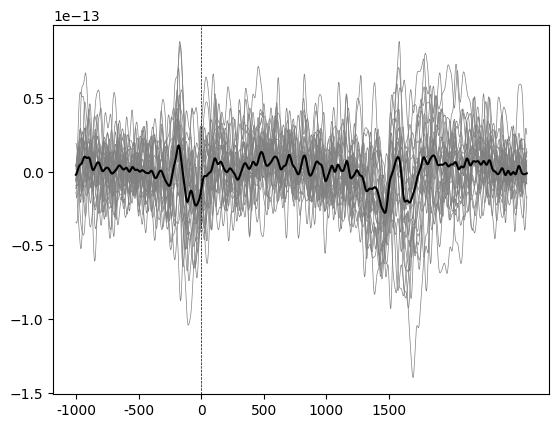

In [34]:
f, ax = plt.subplots(1)
time = np.arange(0, 3000, 500)
ticks_label = ['-1000','-500', '0', '500', '1000', '1500']
evokeds_all_subj = []

# Select channel of interest for N100
channels = n100_elec_clean

for subj in SUBJ_CLEAN :
    evokeds_run = []
    
    for run in run_list :
        print("processing -->", subj)
        # TODO : change with AR_epochs + Filter Data (20 Hz)
        # Select 2 laughter types
        _, path_epochs = get_bids_file(PREPROC_PATH, subj=subj, task=task, run=run, measure='clean-', stage='epo')
        epochs = mne.read_epochs(path_epochs, verbose=None)
        epochs.apply_baseline(baseline=(None, 0))

        evokeds_cond1 = epochs[cond1].average()
        evokeds_cond2 = epochs[cond2].average()
        evokeds = mne.combine_evoked([evokeds_cond1, evokeds_cond2], weights='nave')
        evokeds_run.append(evokeds)
        evokeds.filter(1, 30)
        
    evokeds_all_runs = mne.combine_evoked(evokeds_run, weights='equal')
    evokeds_all_subj.append(evokeds_all_runs)

    evoked_copy = evokeds_all_runs.copy()
    
    evokeds_chan = evoked_copy.pick(picks=channels)
    ave_chan = np.mean(evokeds_chan.get_data(), axis=0)
    
    # Plot signal for each subject individually
    plt.xticks(ticks=time, labels=ticks_label)
    plt.plot(ave_chan, color='grey', linewidth=0.5)
    
# Plot grand average (all subjects average)
grand_ave = mne.combine_evoked(evokeds_all_subj, weights='equal')
grand_ave_copy = grand_ave.copy()
grand_ave_copy.filter(1, 30)

grand_select_chan = grand_ave_copy.pick(picks=channels) 
grand_ave_chan = np.mean(grand_select_chan.get_data(), axis=0)
plt.plot(grand_ave_chan, color = 'black')

# Plot figure with individual signal and group signal
plt.xticks(ticks = time, labels = ticks_label)
plt.axvline(x = 1000, color = 'black', linestyle = 'dashed', linewidth=0.5)
plt.show()

In [30]:
grand_ave.times

array([-1.5       , -1.49916667, -1.49833333, ...,  1.49833333,
        1.49916667,  1.5       ])

In [25]:
epochs.times

array([-0.5       , -0.49916667, -0.49833333, ...,  1.49833333,
        1.49916667,  1.5       ])

In [13]:
ave_chan.shape

(2401,)

# P200

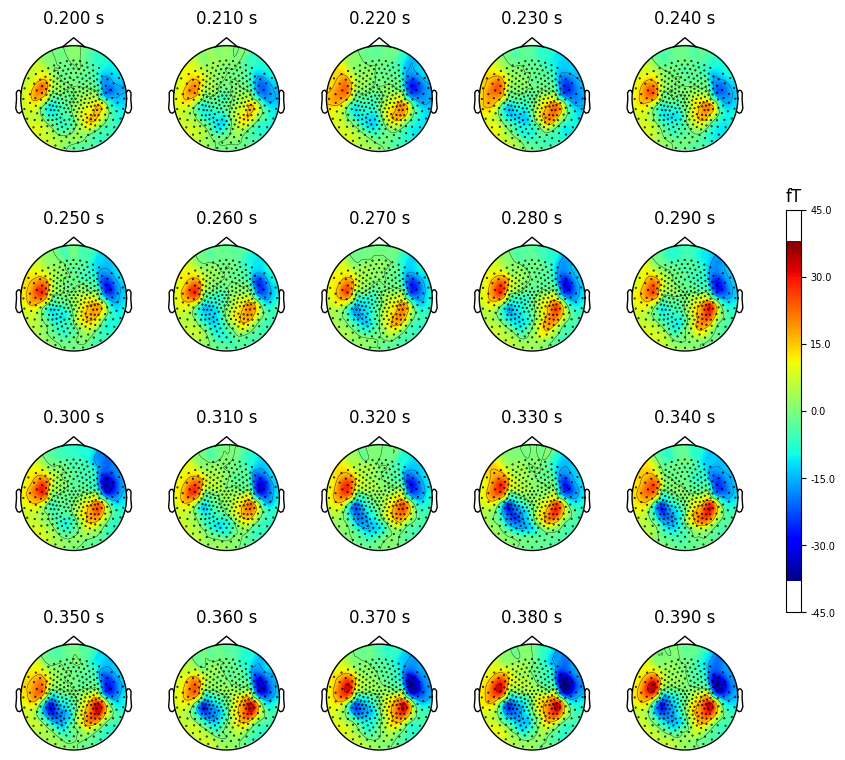

In [8]:
# Plot topomaps around P200
time_range = np.arange(0.2, 0.4, 0.01)
grand_ave.plot_topomap(times=time_range, nrows=4, ncols=5, 
                       extrapolate='head', sphere=(0, 0.017, 0, 0.19),
                       cmap='jet')
plt.show()

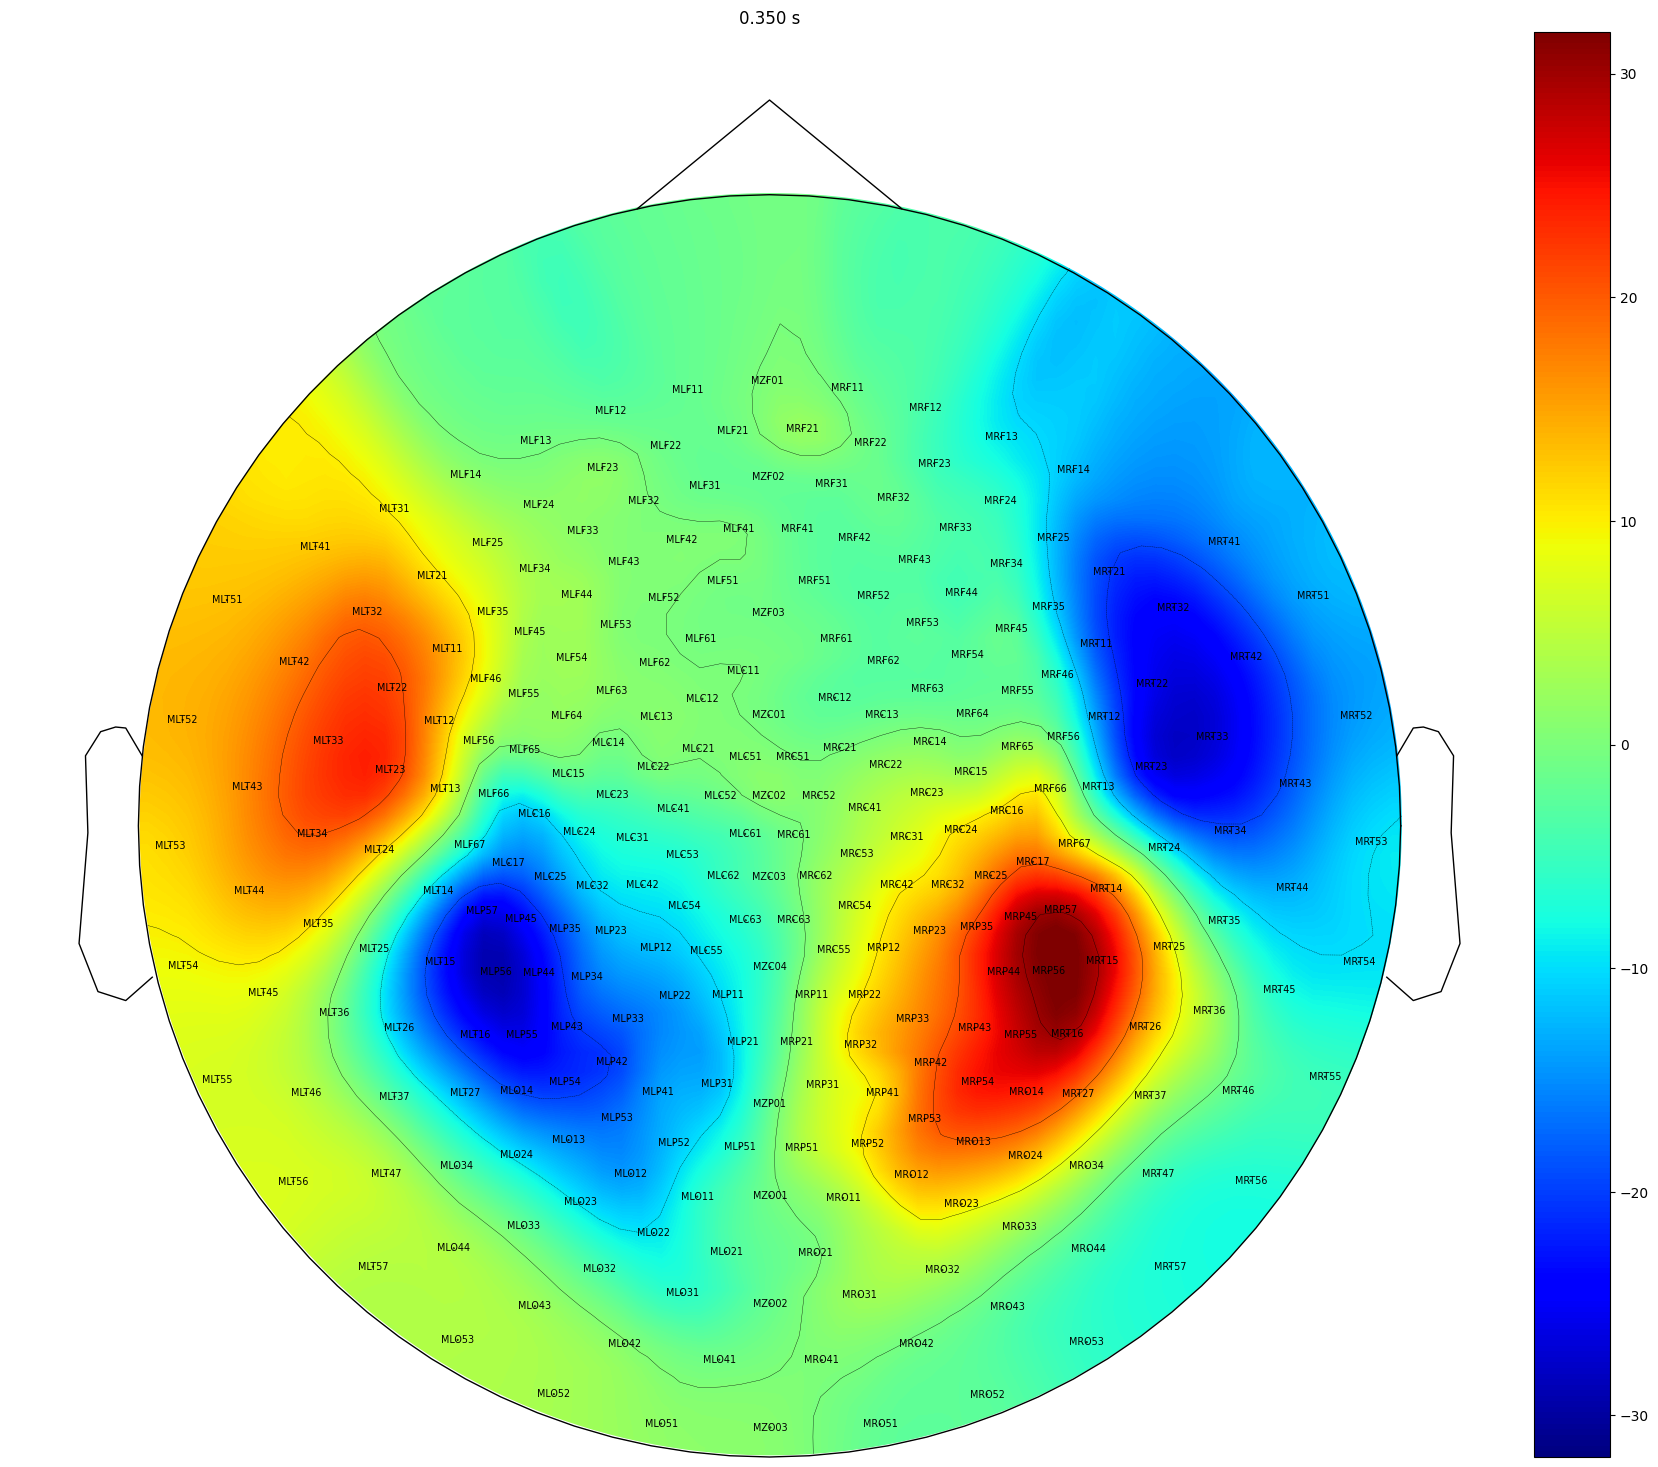

In [9]:
# Look at electrods of interest

time_range = [0.35]

for time in time_range : 
    
    fig, ax_topo = plt.subplots(1, 1, figsize=(20, 20))

    grand_ave.plot_topomap(times=time, nrows=1, ncols=1, 
                           extrapolate='head', sphere=(0, 0.02, 0, 0.19),
                           cmap='jet', axes=ax_topo, colorbar=False,
                           show=False, show_names=True)
    
    image = ax_topo.images[0]

    # create additional axes (for ERF and colorbar)
    divider = make_axes_locatable(ax_topo)

    # add axes for colorbar
    ax_colorbar = divider.append_axes('right', size='5%', pad=0.05)
    plt.colorbar(image, cax=ax_colorbar)
    
    plt.show()

In [10]:
# select data at time=0.170 sec
time_select = np.where(grand_ave.times.round(decimals=3) == 0.3)
grand_ave_p200 = grand_ave.get_data()[:, time_select]

p200_elec = []

for i, elec in enumerate(grand_ave.info['ch_names']):
    if grand_ave_p200[i] > 15e-15 : 
        p200_elec.append(elec)

In [11]:
p200_elec

['MLT11-3105',
 'MLT12-3105',
 'MLT13-3105',
 'MLT22-3105',
 'MLT23-3105',
 'MLT24-3105',
 'MLT32-3105',
 'MLT33-3105',
 'MLT34-3105',
 'MLT42-3105',
 'MLT43-3105',
 'MRO14-3105',
 'MRP35-3105',
 'MRP42-3105',
 'MRP43-3105',
 'MRP44-3105',
 'MRP45-3105',
 'MRP54-3105',
 'MRP55-3105',
 'MRP56-3105',
 'MRP57-3105',
 'MRT15-3105',
 'MRT16-3105',
 'MRT27-3105']

In [12]:
print(len(p200_elec))  
p200_elec_clean = p200_elec.copy()

for i, e in enumerate(p200_elec) : 
    if 'MLT' in p200_elec[i] : 
        p200_elec_clean.remove(e) # Remove regions
        
print(len(p200_elec_clean))     

24
13


processing --> 01
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-01/sub-01_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
296 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 02
Reading /home/claraelk/scratch/laughter_data

/tmp/ipykernel_2960254/4018988182.py:20: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  evoked_copy.filter(1, 20)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
295 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 03
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-03/sub-03_task-LaughterActive_run-all_AR_epo.fif ...


/tmp/ipykernel_2960254/4018988182.py:20: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  evoked_copy.filter(1, 20)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
298 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 04
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-04/sub-04_task-LaughterActive_run-all_AR_epo.fif ...


/tmp/ipykernel_2960254/4018988182.py:20: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  evoked_copy.filter(1, 20)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
292 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 05
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-05/sub-05_task-LaughterActive_run-all_AR_epo.fif ...


/tmp/ipykernel_2960254/4018988182.py:20: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  evoked_copy.filter(1, 20)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
281 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 06
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-06/sub-06_task-LaughterActive_run-all_AR_epo.fif ...


/tmp/ipykernel_2960254/4018988182.py:20: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  evoked_copy.filter(1, 20)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
299 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 07
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-07/sub-07_task-LaughterActive_run-all_AR_epo.fif ...


/tmp/ipykernel_2960254/4018988182.py:20: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  evoked_copy.filter(1, 20)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
300 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 08
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-08/sub-08_task-LaughterActive_run-all_AR_epo.fif ...


/tmp/ipykernel_2960254/4018988182.py:20: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  evoked_copy.filter(1, 20)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
297 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 09
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-09/sub-09_task-LaughterActive_run-all_AR_epo.fif ...


/tmp/ipykernel_2960254/4018988182.py:20: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  evoked_copy.filter(1, 20)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
294 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 10
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-10/sub-10_task-LaughterActive_run-all_AR_epo.fif ...


/tmp/ipykernel_2960254/4018988182.py:20: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  evoked_copy.filter(1, 20)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
299 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 11
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-11/sub-11_task-LaughterActive_run-all_AR_epo.fif ...


/tmp/ipykernel_2960254/4018988182.py:20: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  evoked_copy.filter(1, 20)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
278 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 12
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-12/sub-12_task-LaughterActive_run-all_AR_epo.fif ...


/tmp/ipykernel_2960254/4018988182.py:20: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  evoked_copy.filter(1, 20)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
292 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 13
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-13/sub-13_task-LaughterActive_run-all_AR_epo.fif ...


/tmp/ipykernel_2960254/4018988182.py:20: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  evoked_copy.filter(1, 20)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
289 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 14
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-14/sub-14_task-LaughterActive_run-all_AR_epo.fif ...


/tmp/ipykernel_2960254/4018988182.py:20: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  evoked_copy.filter(1, 20)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
292 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 15
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-15/sub-15_task-LaughterActive_run-all_AR_epo.fif ...


/tmp/ipykernel_2960254/4018988182.py:20: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  evoked_copy.filter(1, 20)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
295 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 16
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-16/sub-16_task-LaughterActive_run-all_AR_epo.fif ...


/tmp/ipykernel_2960254/4018988182.py:20: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  evoked_copy.filter(1, 20)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
297 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 18
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-18/sub-18_task-LaughterActive_run-all_AR_epo.fif ...


/tmp/ipykernel_2960254/4018988182.py:20: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  evoked_copy.filter(1, 20)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
294 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 19
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-19/sub-19_task-LaughterActive_run-all_AR_epo.fif ...


/tmp/ipykernel_2960254/4018988182.py:20: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  evoked_copy.filter(1, 20)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
298 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 20
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-20/sub-20_task-LaughterActive_run-all_AR_epo.fif ...


/tmp/ipykernel_2960254/4018988182.py:20: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  evoked_copy.filter(1, 20)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.2s finished


    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
300 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 21
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-21/sub-21_task-LaughterActive_run-all_AR_epo.fif ...


/tmp/ipykernel_2960254/4018988182.py:20: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  evoked_copy.filter(1, 20)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
300 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 22
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-22/sub-22_task-LaughterActive_run-all_AR_epo.fif ...


/tmp/ipykernel_2960254/4018988182.py:20: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  evoked_copy.filter(1, 20)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
298 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 23
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-23/sub-23_task-LaughterActive_run-all_AR_epo.fif ...


/tmp/ipykernel_2960254/4018988182.py:20: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  evoked_copy.filter(1, 20)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
185 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 24
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-24/sub-24_task-LaughterActive_run-all_AR_epo.fif ...


/tmp/ipykernel_2960254/4018988182.py:20: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  evoked_copy.filter(1, 20)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
297 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 25
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-25/sub-25_task-LaughterActive_run-all_AR_epo.fif ...


/tmp/ipykernel_2960254/4018988182.py:20: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  evoked_copy.filter(1, 20)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
300 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 28
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-28/sub-28_task-LaughterActive_run-all_AR_epo.fif ...


/tmp/ipykernel_2960254/4018988182.py:20: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  evoked_copy.filter(1, 20)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
289 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 30
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-30/sub-30_task-LaughterActive_run-all_AR_epo.fif ...


/tmp/ipykernel_2960254/4018988182.py:20: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  evoked_copy.filter(1, 20)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
300 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 32
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-32/sub-32_task-LaughterActive_run-all_AR_epo.fif ...


/tmp/ipykernel_2960254/4018988182.py:20: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  evoked_copy.filter(1, 20)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
299 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 3961 samples (3.301 sec)

Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-all/erp/sub-all_task-LaughterActive_run-all_cond-LaughReal_meas-grandave-ave.fif ...


/tmp/ipykernel_2960254/4018988182.py:20: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  evoked_copy.filter(1, 20)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =    -500.00 ...    1500.00 ms (0.037 × LaughReal + 0.037 × LaughReal + 0.037 × LaughReal + 0.037 × LaughReal + 0.037 × LaughReal + 0.037 × LaughReal + 0.037 × LaughReal + 0.037 × LaughReal + 0.037 × LaughReal + 0.037 × LaughReal + 0.037 × LaughReal + 0.037 × LaughReal + 0.037 × LaughReal + 0.037 × LaughReal + 0.037 × LaughReal + 0.037 × LaughReal + 0.037 × LaughReal + 0.037 × LaughReal + 0.037 × LaughReal + 0.037 × LaughReal + 0.037 × LaughReal + 0.037 × LaughReal + 0.037 × LaughReal + 0.037 × LaughReal + 0.037 × LaughReal + 0.037 × LaughReal + 0.037 × LaughReal)
        0 CTF compensation matrices available
        nave = 1976 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.5, 0] sec)
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-all/erp/sub-all_task-LaughterActive_run-all_cond-LaughPosed_meas-grandave-ave.fif 

/tmp/ipykernel_2960254/4018988182.py:40: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  grand_ave_copy.filter(1, 20)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


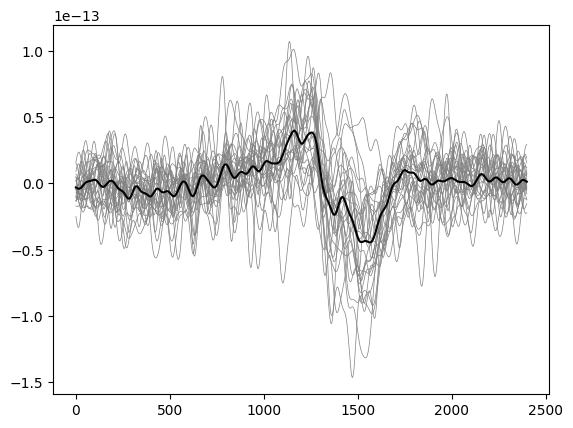

In [13]:
plt.figure()

# Select channel of interest for P200
channels = p200_elec_clean

for subj in SUBJ_CLEAN :
    
    print("processing -->", subj)
    # TODO : change with AR_epochs + Filter Data (20 Hz)
    # Select 2 laughter types
    _, path_epochs = get_bids_file(RESULT_PATH, task=task, subj=subj, stage="AR_epo")
    epochs = mne.read_epochs(path_epochs, verbose=None)
    epochs.apply_baseline(baseline=(None, 0))
    
    evokeds_cond1 = epochs[cond1].average()
    evokeds_cond2 = epochs[cond2].average()
    evokeds = mne.combine_evoked([evokeds_cond1, evokeds_cond2], weights='equal')
    
    evoked_copy = evokeds.copy()
    evoked_copy.filter(1, 20)
    
    evokeds_chan = evoked_copy.pick(picks=channels)
    ave_chan = np.mean(evokeds_chan.get_data(), axis=0)
    
    # Plot signal for each subject individually
    plt.plot(ave_chan, color='grey', linewidth=0.5)
    
# Plot grand average (all subjects average)
grand_ave_path1 = RESULT_PATH + 'meg/reports/sub-all/erp/sub-all_task-{}_run-all_cond-{}_meas-grandave-ave.fif'.format(task, cond1)
grand_ave_path2 = RESULT_PATH + 'meg/reports/sub-all/erp/sub-all_task-{}_run-all_cond-{}_meas-grandave-ave.fif'.format(task, cond2)

grand_ave_erp1 = mne.read_evokeds(grand_ave_path1)
grand_ave_erp2 = mne.read_evokeds(grand_ave_path2)

grand_ave1 = grand_ave_erp1[0]
grand_ave2 = grand_ave_erp2[0]
grand_ave = mne.combine_evoked([grand_ave1, grand_ave2], weights='equal')
grand_ave.apply_baseline(baseline=(None, 0))
grand_ave_copy = grand_ave.copy()
grand_ave_copy.filter(1, 20)

grand_select_chan = grand_ave_copy.pick(picks=channels) 
grand_ave_chan = np.mean(grand_select_chan.get_data(), axis=0)
plt.plot(grand_ave_chan, color='black')

# Plot figure with individual signal and group signal
plt.show()

# LPC

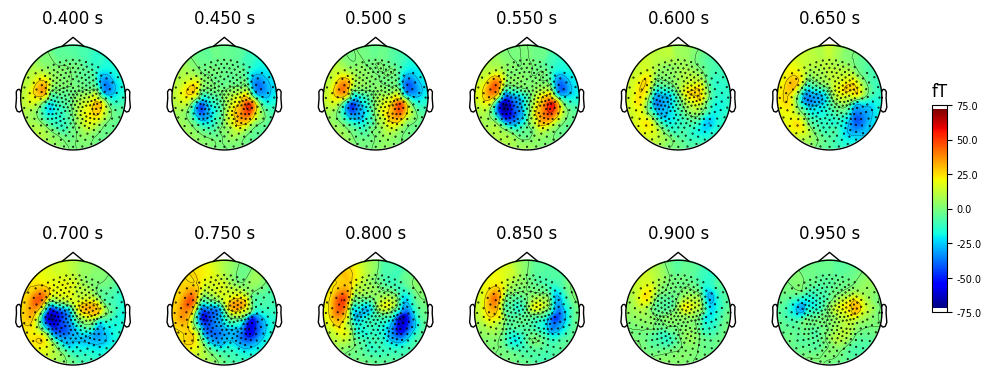

In [6]:
# Plot topomaps around LPC
time_range = np.arange(0.4, 1, 0.05)
grand_ave.plot_topomap(times=time_range, nrows=2, ncols=6, 
                       extrapolate='head', sphere=(0, 0.017, 0, 0.19),
                       cmap='jet')
plt.show()

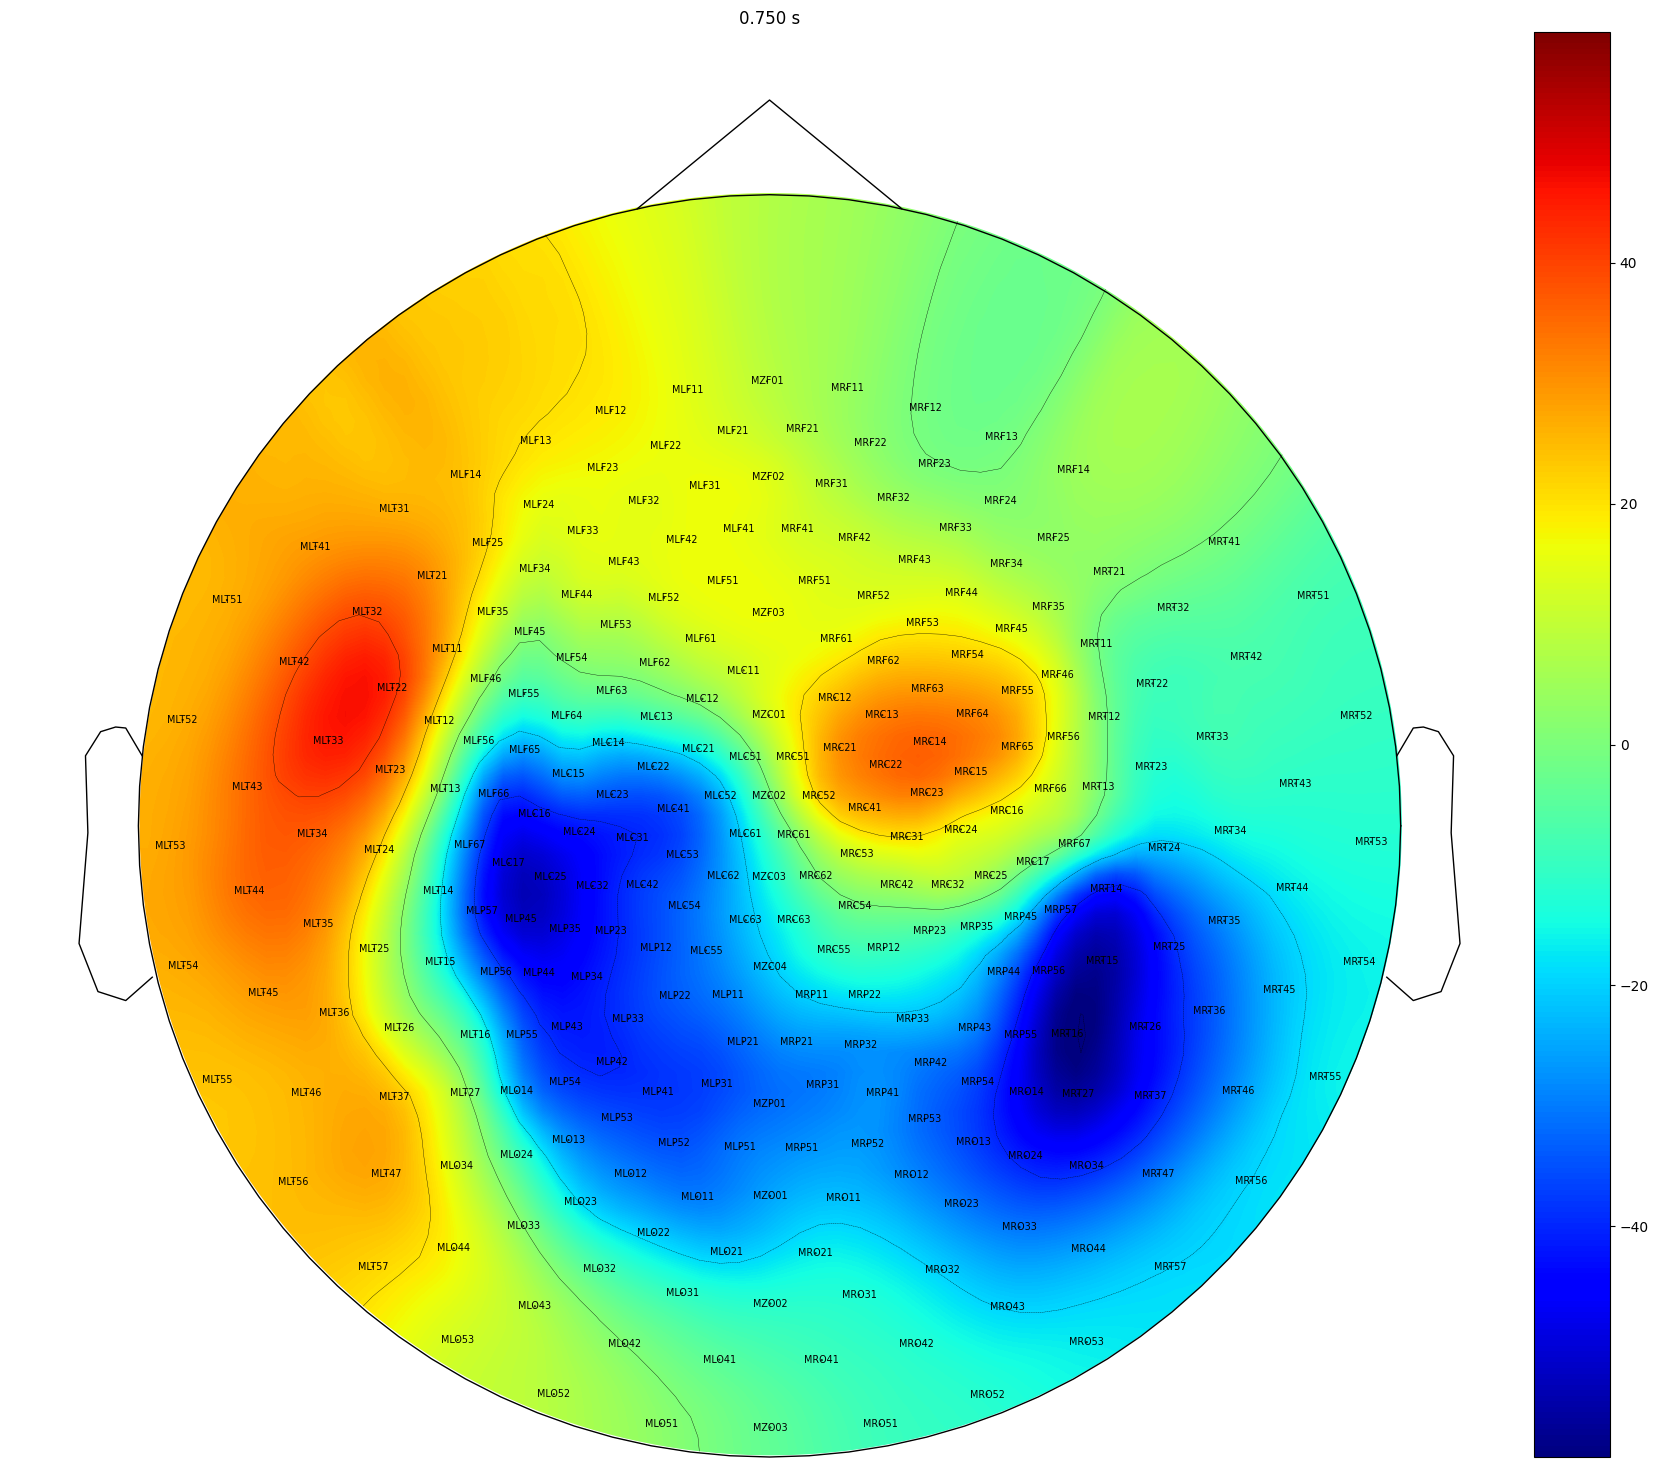

In [27]:
# Look at electrods of interest

time_range = [0.750]

for time in time_range : 
    
    fig, ax_topo = plt.subplots(1, 1, figsize=(20, 20))

    grand_ave.plot_topomap(times=time, nrows=1, ncols=1, 
                           extrapolate='head', sphere=(0, 0.02, 0, 0.19),
                           cmap='jet', axes=ax_topo, colorbar=False,
                           show=False, show_names=True)
    
    image = ax_topo.images[0]

    # create additional axes (for ERF and colorbar)
    divider = make_axes_locatable(ax_topo)

    # add axes for colorbar
    ax_colorbar = divider.append_axes('right', size='5%', pad=0.05)
    plt.colorbar(image, cax=ax_colorbar)
    
    plt.show()

In [28]:
# select data at time=0.170 sec
time_select = np.where(grand_ave.times.round(decimals=3) == 0.750)
grand_ave_lpc = grand_ave.get_data()[:, time_select]

lpc_elec = []

for i, elec in enumerate(grand_ave.info['ch_names']):
    if grand_ave_lpc[i] > 15e-15 : 
        lpc_elec.append(elec)

In [29]:
'''print(len(lpc_elec))  
lpc_elec_clean = lpc_elec.copy()

for i, e in enumerate(lpc_elec) : 
    if 'MLT' in lpc_elec[i] : 
        lpc_elec_clean.remove(e) # Remove regions
        
print(len(lpc_elec_clean))    '''

"print(len(lpc_elec))  \nlpc_elec_clean = lpc_elec.copy()\n\nfor i, e in enumerate(lpc_elec) : \n    if 'MLT' in lpc_elec[i] : \n        lpc_elec_clean.remove(e) # Remove regions\n        \nprint(len(lpc_elec_clean))    "

processing --> 01
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-01/sub-01_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
296 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 3961 samples (3.301 sec)



/tmp/ipykernel_1486729/1710222601.py:20: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  evoked_copy.filter(1, 20)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    7.9s finished


processing --> 02
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-02/sub-02_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
295 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 3961 samples (3.301 sec)



/tmp/ipykernel_1486729/1710222601.py:20: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  evoked_copy.filter(1, 20)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s


processing --> 03
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-03/sub-03_task-LaughterActive_run-all_AR_epo.fif ...


[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    1.6s finished


    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
298 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 3961 samples (3.301 sec)



/tmp/ipykernel_1486729/1710222601.py:20: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  evoked_copy.filter(1, 20)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    2.7s finished


processing --> 04
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-04/sub-04_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
292 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 3961 samples (3.301 sec)



/tmp/ipykernel_1486729/1710222601.py:20: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  evoked_copy.filter(1, 20)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


processing --> 05
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-05/sub-05_task-LaughterActive_run-all_AR_epo.fif ...


[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    2.0s finished


    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
281 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 3961 samples (3.301 sec)



/tmp/ipykernel_1486729/1710222601.py:20: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  evoked_copy.filter(1, 20)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


processing --> 06
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-06/sub-06_task-LaughterActive_run-all_AR_epo.fif ...


[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    2.5s finished


    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
299 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 3961 samples (3.301 sec)



/tmp/ipykernel_1486729/1710222601.py:20: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  evoked_copy.filter(1, 20)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


processing --> 07
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-07/sub-07_task-LaughterActive_run-all_AR_epo.fif ...


[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    1.3s finished


    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
300 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 3961 samples (3.301 sec)



/tmp/ipykernel_1486729/1710222601.py:20: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  evoked_copy.filter(1, 20)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


processing --> 08
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-08/sub-08_task-LaughterActive_run-all_AR_epo.fif ...


[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    2.4s finished


    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
297 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 3961 samples (3.301 sec)



/tmp/ipykernel_1486729/1710222601.py:20: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  evoked_copy.filter(1, 20)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


processing --> 09
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-09/sub-09_task-LaughterActive_run-all_AR_epo.fif ...


[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    2.7s finished


    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
294 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 3961 samples (3.301 sec)



/tmp/ipykernel_1486729/1710222601.py:20: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  evoked_copy.filter(1, 20)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    4.7s finished


processing --> 10
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-10/sub-10_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
299 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 3961 samples (3.301 sec)



/tmp/ipykernel_1486729/1710222601.py:20: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  evoked_copy.filter(1, 20)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


processing --> 11
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-11/sub-11_task-LaughterActive_run-all_AR_epo.fif ...


[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    2.8s finished


    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
278 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 3961 samples (3.301 sec)



/tmp/ipykernel_1486729/1710222601.py:20: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  evoked_copy.filter(1, 20)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s


processing --> 12
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-12/sub-12_task-LaughterActive_run-all_AR_epo.fif ...


[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:   14.4s finished


    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
292 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 3961 samples (3.301 sec)



/tmp/ipykernel_1486729/1710222601.py:20: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  evoked_copy.filter(1, 20)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


processing --> 13
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-13/sub-13_task-LaughterActive_run-all_AR_epo.fif ...


[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    4.4s finished


    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
289 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 3961 samples (3.301 sec)



/tmp/ipykernel_1486729/1710222601.py:20: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  evoked_copy.filter(1, 20)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s


processing --> 14
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-14/sub-14_task-LaughterActive_run-all_AR_epo.fif ...


[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    3.9s finished


    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
292 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 3961 samples (3.301 sec)



/tmp/ipykernel_1486729/1710222601.py:20: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  evoked_copy.filter(1, 20)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


processing --> 15
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-15/sub-15_task-LaughterActive_run-all_AR_epo.fif ...


[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    8.6s finished


    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
295 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 3961 samples (3.301 sec)



/tmp/ipykernel_1486729/1710222601.py:20: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  evoked_copy.filter(1, 20)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


processing --> 16
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-16/sub-16_task-LaughterActive_run-all_AR_epo.fif ...


[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.2s finished


    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
297 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 3961 samples (3.301 sec)



/tmp/ipykernel_1486729/1710222601.py:20: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  evoked_copy.filter(1, 20)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.5s remaining:    0.0s


processing --> 18
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-18/sub-18_task-LaughterActive_run-all_AR_epo.fif ...


[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    2.2s finished


    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
294 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 3961 samples (3.301 sec)



/tmp/ipykernel_1486729/1710222601.py:20: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  evoked_copy.filter(1, 20)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


processing --> 19
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-19/sub-19_task-LaughterActive_run-all_AR_epo.fif ...


[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    2.5s finished


    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
298 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 20


/tmp/ipykernel_1486729/1710222601.py:20: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  evoked_copy.filter(1, 20)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-20/sub-20_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
300 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 21


/tmp/ipykernel_1486729/1710222601.py:20: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  evoked_copy.filter(1, 20)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-21/sub-21_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
300 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 22
Reading /home/claraelk/scratch/laughter_data/results/meg/repor

/tmp/ipykernel_1486729/1710222601.py:20: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  evoked_copy.filter(1, 20)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
298 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 23
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-23/sub-23_task-LaughterActive_run-all_AR_epo.fif ...


/tmp/ipykernel_1486729/1710222601.py:20: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  evoked_copy.filter(1, 20)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
185 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 24


/tmp/ipykernel_1486729/1710222601.py:20: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  evoked_copy.filter(1, 20)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-24/sub-24_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
297 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 25
Reading /home/claraelk/scratch/laughter_data/results/meg/repor

/tmp/ipykernel_1486729/1710222601.py:20: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  evoked_copy.filter(1, 20)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
300 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 3961 samples (3.301 sec)



/tmp/ipykernel_1486729/1710222601.py:20: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  evoked_copy.filter(1, 20)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


processing --> 28
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-28/sub-28_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
289 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 30
Reading /home/claraelk/scratch/laughter_data

/tmp/ipykernel_1486729/1710222601.py:20: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  evoked_copy.filter(1, 20)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
300 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 32
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-32/sub-32_task-LaughterActive_run-all_AR_epo.fif ...


/tmp/ipykernel_1486729/1710222601.py:20: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  evoked_copy.filter(1, 20)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
299 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 3961 samples (3.301 sec)

Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-all/erp/sub-all_task-LaughterActive_run-all_cond-LaughReal_meas-grandave-ave.fif ...


/tmp/ipykernel_1486729/1710222601.py:20: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  evoked_copy.filter(1, 20)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =    -500.00 ...    1500.00 ms (0.037 × LaughReal + 0.037 × LaughReal + 0.037 × LaughReal + 0.037 × LaughReal + 0.037 × LaughReal + 0.037 × LaughReal + 0.037 × LaughReal + 0.037 × LaughReal + 0.037 × LaughReal + 0.037 × LaughReal + 0.037 × LaughReal + 0.037 × LaughReal + 0.037 × LaughReal + 0.037 × LaughReal + 0.037 × LaughReal + 0.037 × LaughReal + 0.037 × LaughReal + 0.037 × LaughReal + 0.037 × LaughReal + 0.037 × LaughReal + 0.037 × LaughReal + 0.037 × LaughReal + 0.037 × LaughReal + 0.037 × LaughReal + 0.037 × LaughReal + 0.037 × LaughReal + 0.037 × LaughReal)
        0 CTF compensation matrices available
        nave = 1976 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.5, 0] sec)
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-all/erp/sub-all_task-LaughterActive_run-all_cond-LaughPosed_meas-grandave-ave.fif 

/tmp/ipykernel_1486729/1710222601.py:40: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  grand_ave_copy.filter(1, 20)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


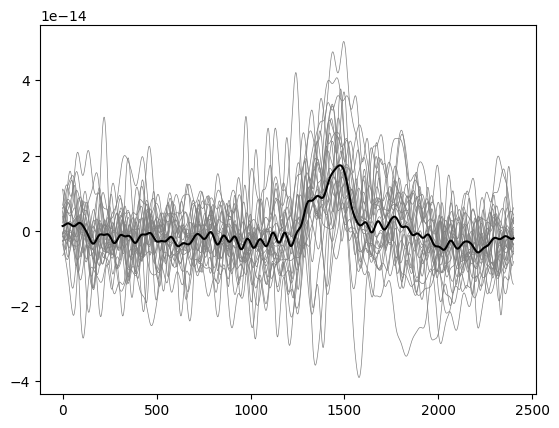

In [30]:
plt.figure()

# Select channel of interest for LPC
channels = lpc_elec_clean

for subj in SUBJ_CLEAN :
    
    print("processing -->", subj)
    # TODO : change with AR_epochs + Filter Data (20 Hz)
    # Select 2 laughter types
    _, path_epochs = get_bids_file(RESULT_PATH, task=task, subj=subj, stage="AR_epo")
    epochs = mne.read_epochs(path_epochs, verbose=None)
    epochs.apply_baseline(baseline=(None, 0))
    
    evokeds_cond1 = epochs[cond1].average()
    evokeds_cond2 = epochs[cond2].average()
    evokeds = mne.combine_evoked([evokeds_cond1, evokeds_cond2], weights='equal')
    
    evoked_copy = evokeds.copy()
    evoked_copy.filter(1, 20)
    
    evokeds_chan = evoked_copy.pick(picks=channels)
    ave_chan = np.mean(evokeds_chan.get_data(), axis=0)
    
    # Plot signal for each subject individually
    plt.plot(ave_chan, color='grey', linewidth=0.5)
    
# Plot grand average (all subjects average)
grand_ave_path1 = RESULT_PATH + 'meg/reports/sub-all/erp/sub-all_task-{}_run-all_cond-{}_meas-grandave-ave.fif'.format(task, cond1)
grand_ave_path2 = RESULT_PATH + 'meg/reports/sub-all/erp/sub-all_task-{}_run-all_cond-{}_meas-grandave-ave.fif'.format(task, cond2)

grand_ave_erp1 = mne.read_evokeds(grand_ave_path1)
grand_ave_erp2 = mne.read_evokeds(grand_ave_path2)

grand_ave1 = grand_ave_erp1[0]
grand_ave2 = grand_ave_erp2[0]
grand_ave = mne.combine_evoked([grand_ave1, grand_ave2], weights='equal')
grand_ave.apply_baseline(baseline=(None, 0))
grand_ave_copy = grand_ave.copy()
grand_ave_copy.filter(1, 20)

grand_select_chan = grand_ave_copy.pick(picks=channels) 
grand_ave_chan = np.mean(grand_select_chan.get_data(), axis=0)
plt.plot(grand_ave_chan, color='black')

# Plot figure with individual signal and group signal
plt.show()

## Condition controls

In [7]:
task = 'LaughterActive'
subj_list = SUBJ_CLEAN
stage = "epo"

# Select what conditions to compute (str)
cond1 = 'Good'
cond2 = 'Miss'
conditions = conditions = cond1 + '-' + cond2
condition_list = [cond1, cond2]
picks = "meg" # Select MEG channels

In [8]:
for subj in SUBJ_CLEAN :
    
    print("processing -->", subj)
    # TODO : change with AR_epochs + Filter Data (20 Hz)
    # Select 2 laughter types
    _, path_epochs = get_bids_file(RESULT_PATH, task=task, subj=subj, stage="AR_epo")
    epochs = mne.read_epochs(path_epochs, verbose=None)
    epochs.apply_baseline(baseline=(None, 0))
    
    evokeds_cond1 = epochs[cond1].average()
    evokeds_cond2 = epochs[cond2].average()
    evokeds = mne.combine_evoked([evokeds_cond1, evokeds_cond2], weights='nave')
    
    evoked_copy = evokeds.copy()
    
# Plot grand average (all subjects average)
grand_ave_path1 = RESULT_PATH + 'meg/reports/sub-all/erp/sub-all_task-{}_run-all_cond-{}_meas-grandave-ave.fif'.format(task, cond1)
grand_ave_path2 = RESULT_PATH + 'meg/reports/sub-all/erp/sub-all_task-{}_run-all_cond-{}_meas-grandave-ave.fif'.format(task, cond2)

grand_ave_erp1 = mne.read_evokeds(grand_ave_path1)
grand_ave_erp2 = mne.read_evokeds(grand_ave_path2)

grand_ave1 = grand_ave_erp1[0]
grand_ave2 = grand_ave_erp2[0]
grand_ave = mne.combine_evoked([grand_ave1, grand_ave2], weights='equal')

processing --> 01
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-01/sub-01_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
296 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
processing --> 02
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-02/sub-02_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
295 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
processing --> 03
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-03/sub-03_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of in

Adding metadata with 7 columns
300 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
processing --> 22
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-22/sub-22_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
298 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
processing --> 23
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-23/sub-23_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
185 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
proce

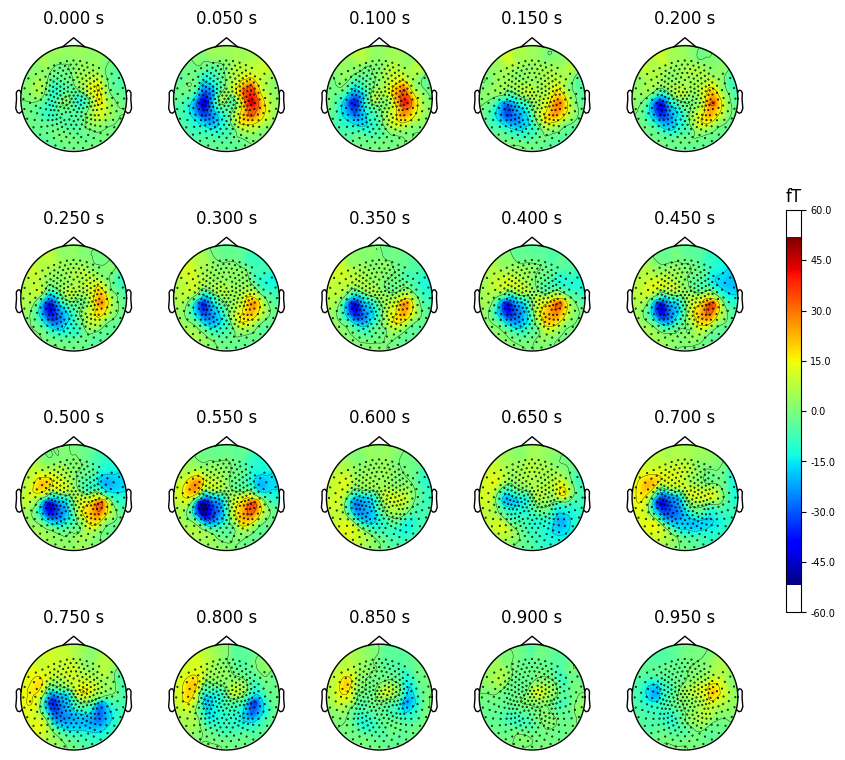

In [10]:
# Plot topomaps around LPC
time_range = np.arange(0, 1, 0.05)
grand_ave.plot_topomap(times=time_range, nrows=4, ncols=5, 
                       extrapolate='head', sphere=(0, 0.017, 0, 0.19),
                       cmap='jet')
plt.show()

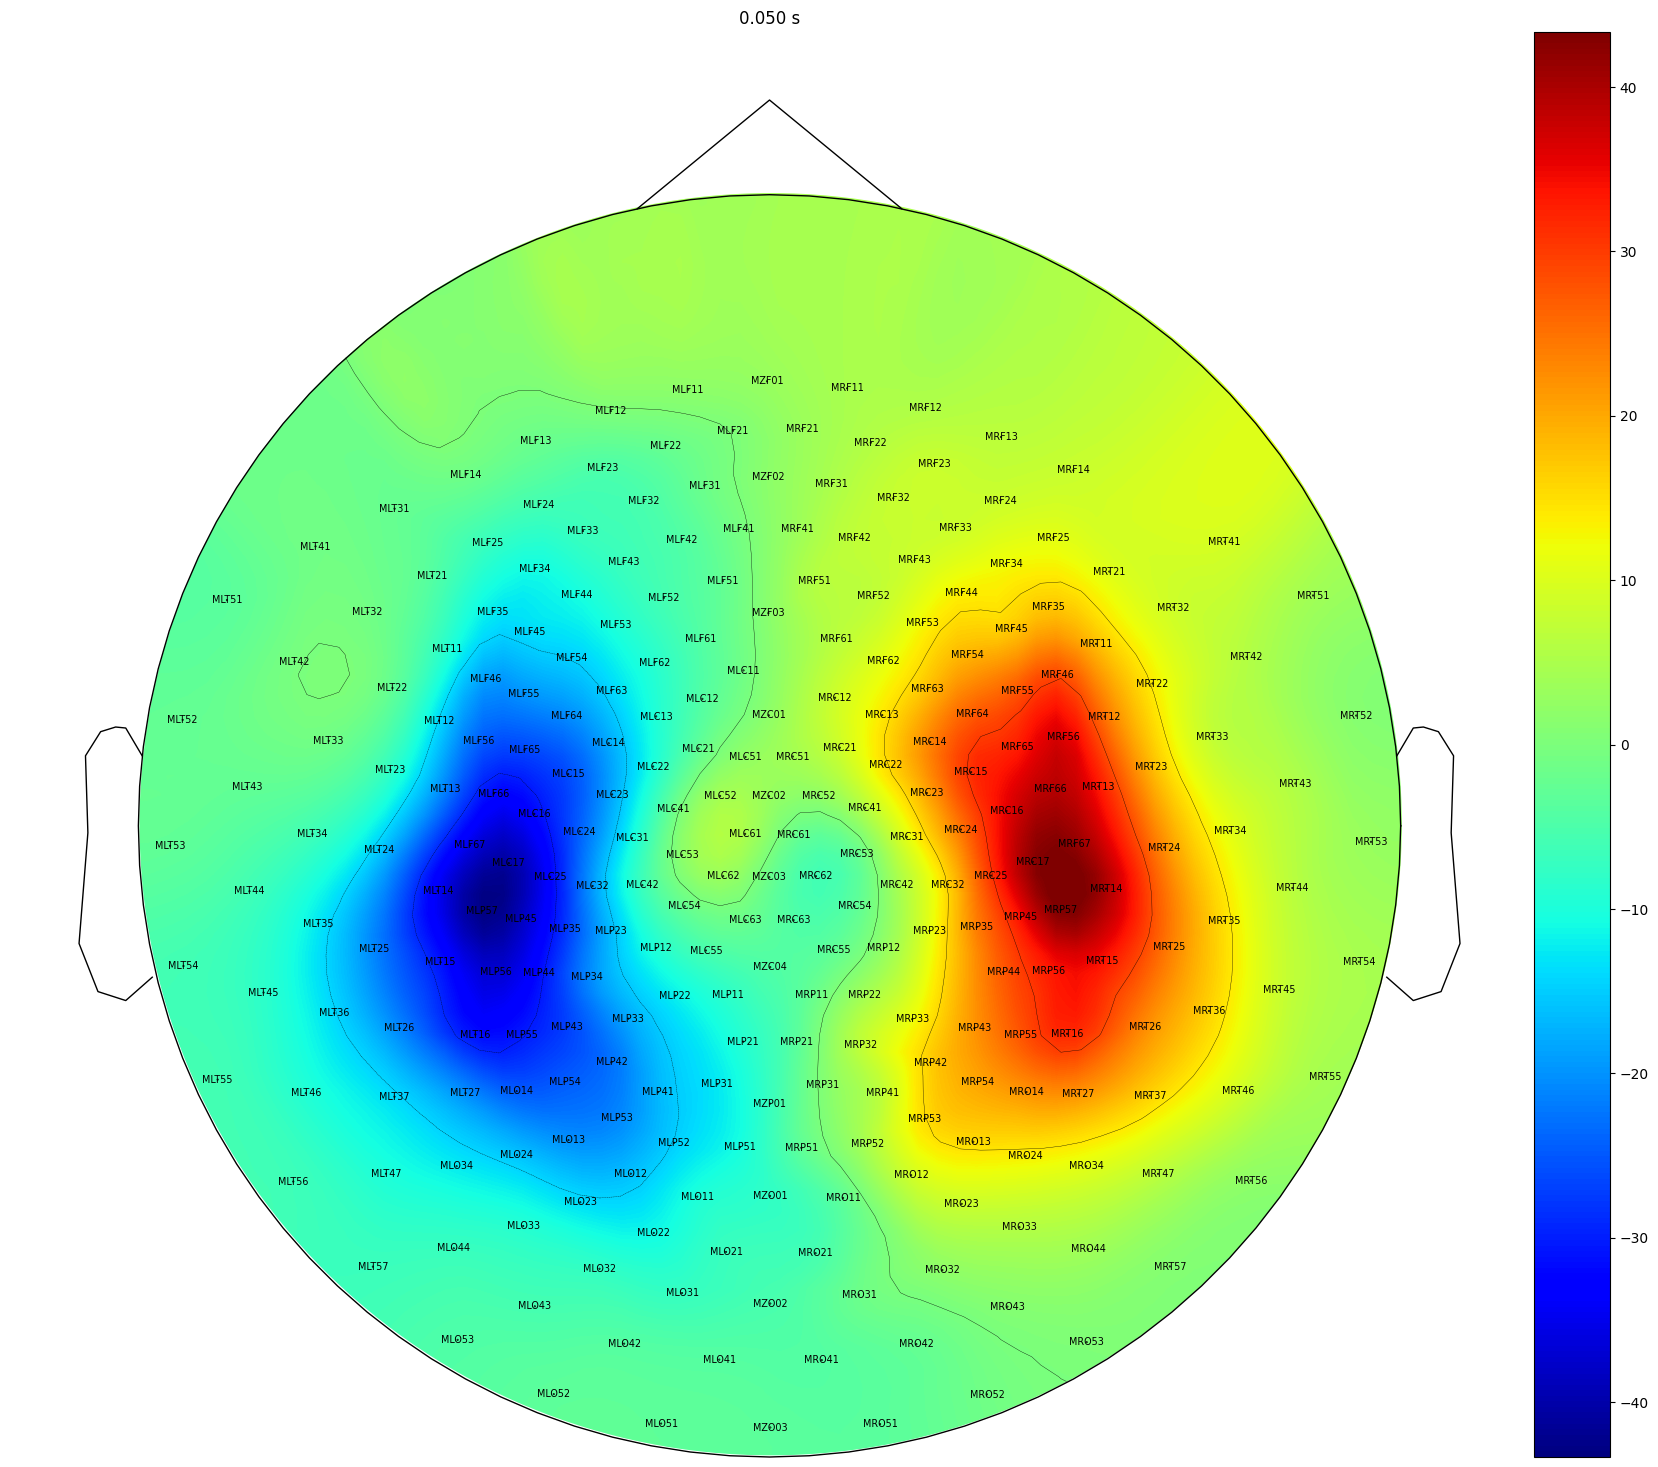

In [11]:
# Look at electrods of interest

time_range = [0.050]

for time in time_range : 
    
    fig, ax_topo = plt.subplots(1, 1, figsize=(20, 20))

    grand_ave.plot_topomap(times=time, nrows=1, ncols=1, 
                           extrapolate='head', sphere=(0, 0.02, 0, 0.19),
                           cmap='jet', axes=ax_topo, colorbar=False,
                           show=False, show_names=True)
    
    image = ax_topo.images[0]

    # create additional axes (for ERF and colorbar)
    divider = make_axes_locatable(ax_topo)

    # add axes for colorbar
    ax_colorbar = divider.append_axes('right', size='5%', pad=0.05)
    plt.colorbar(image, cax=ax_colorbar)
    
    plt.show()

In [20]:
# select data at time=0.170 sec
time_select = np.where(grand_ave.times.round(decimals=3) == 0.050)
grand_ave_motor = grand_ave.get_data()[:, time_select]

motor_elec_positive = []
motor_elec_negative = []

for i, elec in enumerate(grand_ave.info['ch_names']):
    if grand_ave_motor[i] > 20e-15 : 
        motor_elec_positive.append(elec)
    elif grand_ave_motor[i] < 20e-15 : 
        motor_elec_negative.append(elec)


processing --> 01
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-01/sub-01_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
296 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 02
Reading /home/claraelk/scratch/laughter_data

/tmp/ipykernel_2503207/3187377045.py:20: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  evoked_copy.filter(1, 20)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
295 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 03
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-03/sub-03_task-LaughterActive_run-all_AR_epo.fif ...


/tmp/ipykernel_2503207/3187377045.py:20: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  evoked_copy.filter(1, 20)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
298 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 04
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-04/sub-04_task-LaughterActive_run-all_AR_epo.fif ...


/tmp/ipykernel_2503207/3187377045.py:20: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  evoked_copy.filter(1, 20)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
292 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 05
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-05/sub-05_task-LaughterActive_run-all_AR_epo.fif ...


/tmp/ipykernel_2503207/3187377045.py:20: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  evoked_copy.filter(1, 20)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
281 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 06
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-06/sub-06_task-LaughterActive_run-all_AR_epo.fif ...


/tmp/ipykernel_2503207/3187377045.py:20: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  evoked_copy.filter(1, 20)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
299 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 3961 samples (3.301 sec)



/tmp/ipykernel_2503207/3187377045.py:20: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  evoked_copy.filter(1, 20)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


processing --> 07
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-07/sub-07_task-LaughterActive_run-all_AR_epo.fif ...


[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
300 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 08
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-08/sub-08_task-LaughterActive_run-all_AR_epo.fif ...


/tmp/ipykernel_2503207/3187377045.py:20: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  evoked_copy.filter(1, 20)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
297 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 09
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-09/sub-09_task-LaughterActive_run-all_AR_epo.fif ...


/tmp/ipykernel_2503207/3187377045.py:20: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  evoked_copy.filter(1, 20)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
294 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 10
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-10/sub-10_task-LaughterActive_run-all_AR_epo.fif ...


/tmp/ipykernel_2503207/3187377045.py:20: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  evoked_copy.filter(1, 20)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
299 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 11
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-11/sub-11_task-LaughterActive_run-all_AR_epo.fif ...


/tmp/ipykernel_2503207/3187377045.py:20: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  evoked_copy.filter(1, 20)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
278 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 12
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-12/sub-12_task-LaughterActive_run-all_AR_epo.fif ...


/tmp/ipykernel_2503207/3187377045.py:20: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  evoked_copy.filter(1, 20)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
292 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 13
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-13/sub-13_task-LaughterActive_run-all_AR_epo.fif ...


/tmp/ipykernel_2503207/3187377045.py:20: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  evoked_copy.filter(1, 20)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
289 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 14
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-14/sub-14_task-LaughterActive_run-all_AR_epo.fif ...


/tmp/ipykernel_2503207/3187377045.py:20: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  evoked_copy.filter(1, 20)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
292 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 15
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-15/sub-15_task-LaughterActive_run-all_AR_epo.fif ...


/tmp/ipykernel_2503207/3187377045.py:20: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  evoked_copy.filter(1, 20)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
295 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 16
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-16/sub-16_task-LaughterActive_run-all_AR_epo.fif ...


/tmp/ipykernel_2503207/3187377045.py:20: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  evoked_copy.filter(1, 20)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
297 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 18
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-18/sub-18_task-LaughterActive_run-all_AR_epo.fif ...


/tmp/ipykernel_2503207/3187377045.py:20: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  evoked_copy.filter(1, 20)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
294 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 19
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-19/sub-19_task-LaughterActive_run-all_AR_epo.fif ...


/tmp/ipykernel_2503207/3187377045.py:20: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  evoked_copy.filter(1, 20)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
298 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 20
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-20/sub-20_task-LaughterActive_run-all_AR_epo.fif ...


/tmp/ipykernel_2503207/3187377045.py:20: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  evoked_copy.filter(1, 20)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
300 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 3961 samples (3.301 sec)



/tmp/ipykernel_2503207/3187377045.py:20: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  evoked_copy.filter(1, 20)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


processing --> 21
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-21/sub-21_task-LaughterActive_run-all_AR_epo.fif ...


[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
300 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 22
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-22/sub-22_task-LaughterActive_run-all_AR_epo.fif ...


/tmp/ipykernel_2503207/3187377045.py:20: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  evoked_copy.filter(1, 20)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
298 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 23
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-23/sub-23_task-LaughterActive_run-all_AR_epo.fif ...


/tmp/ipykernel_2503207/3187377045.py:20: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  evoked_copy.filter(1, 20)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
185 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 3961 samples (3.301 sec)



/tmp/ipykernel_2503207/3187377045.py:20: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  evoked_copy.filter(1, 20)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


processing --> 24
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-24/sub-24_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
297 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 25
Reading /home/claraelk/scratch/laughter_data

/tmp/ipykernel_2503207/3187377045.py:20: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  evoked_copy.filter(1, 20)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
300 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 28
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-28/sub-28_task-LaughterActive_run-all_AR_epo.fif ...


/tmp/ipykernel_2503207/3187377045.py:20: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  evoked_copy.filter(1, 20)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
289 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 30
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-30/sub-30_task-LaughterActive_run-all_AR_epo.fif ...


/tmp/ipykernel_2503207/3187377045.py:20: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  evoked_copy.filter(1, 20)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
300 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 3961 samples (3.301 sec)

processing --> 32
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-32/sub-32_task-LaughterActive_run-all_AR_epo.fif ...


/tmp/ipykernel_2503207/3187377045.py:20: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  evoked_copy.filter(1, 20)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
299 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 3961 samples (3.301 sec)

Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-all/erp/sub-all_task-LaughterActive_run-all_cond-Good_meas-grandave-ave.fif ...


/tmp/ipykernel_2503207/3187377045.py:20: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  evoked_copy.filter(1, 20)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


    Found the data of interest:
        t =    -500.00 ...    1500.00 ms (0.012 × LaughReal + 0.012 × LaughReal + 0.012 × LaughReal + 0.012 × LaughReal + 0.012 × LaughReal + 0.012 × LaughReal + 0.012 × LaughReal + 0.012 × LaughReal + 0.012 × LaughReal + 0.012 × LaughReal + 0.012 × LaughReal + 0.012 × LaughReal + 0.012 × LaughReal + 0.012 × LaughReal + 0.012 × LaughReal + 0.012 × LaughReal + 0.012 × LaughReal + 0.012 × LaughReal + 0.012 × LaughReal + 0.012 × LaughReal + 0.012 × LaughReal + 0.012 × LaughReal + 0.012 × LaughReal + 0.012 × LaughReal + 0.012 × LaughReal + 0.012 × LaughReal + 0.012 × LaughReal + 0.012 × LaughPosed + 0.012 × LaughPosed + 0.012 × LaughPosed + 0.012 × LaughPosed + 0.012 × LaughPosed + 0.012 × LaughPosed + 0.012 × LaughPosed + 0.012 × LaughPosed + 0.012 × LaughPosed + 0.012 × LaughPosed + 0.012 × LaughPosed + 0.012 × LaughPosed + 0.012 × LaughPosed + 0.012 × LaughPosed + 0.012 × LaughPosed + 0.012 × LaughPosed + 0.012 × LaughPosed + 0.012 × LaughPosed + 0.012 × 

/tmp/ipykernel_2503207/3187377045.py:40: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  grand_ave_copy.filter(1, 20)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.1s finished


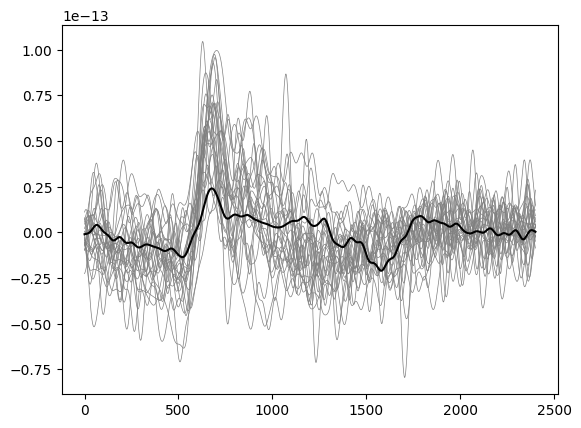

In [23]:
plt.figure()

# Select channel of interest for LPC
channels = motor_elec_positive

for subj in SUBJ_CLEAN :
    
    print("processing -->", subj)
    # TODO : change with AR_epochs + Filter Data (20 Hz)
    # Select 2 laughter types
    _, path_epochs = get_bids_file(RESULT_PATH, task=task, subj=subj, stage="AR_epo")
    epochs = mne.read_epochs(path_epochs, verbose=None)
    epochs.apply_baseline(baseline=(None, 0))
    
    evokeds_cond1 = epochs[cond1].average()
    evokeds_cond2 = epochs[cond2].average()
    evokeds = mne.combine_evoked([evokeds_cond1, evokeds_cond2], weights='nave')
    
    evoked_copy = evokeds.copy()
    evoked_copy.filter(1, 20)
    
    evokeds_chan = evoked_copy.pick(picks=channels)
    ave_chan = np.mean(evokeds_chan.get_data(), axis=0)
    
    # Plot signal for each subject individually
    plt.plot(ave_chan, color='grey', linewidth=0.5)
    
# Plot grand average (all subjects average)
grand_ave_path1 = RESULT_PATH + 'meg/reports/sub-all/erp/sub-all_task-{}_run-all_cond-{}_meas-grandave-ave.fif'.format(task, cond1)
grand_ave_path2 = RESULT_PATH + 'meg/reports/sub-all/erp/sub-all_task-{}_run-all_cond-{}_meas-grandave-ave.fif'.format(task, cond2)

grand_ave_erp1 = mne.read_evokeds(grand_ave_path1)
grand_ave_erp2 = mne.read_evokeds(grand_ave_path2)

grand_ave1 = grand_ave_erp1[0]
grand_ave2 = grand_ave_erp2[0]
grand_ave = mne.combine_evoked([grand_ave1, grand_ave2], weights='equal')
grand_ave.apply_baseline(baseline=(None, 0))
grand_ave_copy = grand_ave.copy()
grand_ave_copy.filter(1, 20)

grand_select_chan = grand_ave_copy.pick(picks=channels) 
grand_ave_chan = np.mean(grand_select_chan.get_data(), axis=0)
plt.plot(grand_ave_chan, color='black')

# Plot figure with individual signal and group signal
plt.show()